<h1 align='center'>Analyzing Modeling Clustering Method</h1>

## Table of Contents
1. [Project Summary](#1)
2. [Data Information](#2)
3. [Model 1 Clustering](#3)
4. [Model 2 Clustering](#4)
5. [Conclusion](#5)
          
---
<h2 align='center'>Project Summary<a name='1'></a></h2>


### What is Plasma?
<p align='center'>
    <img src='https://endoconsult.b-cdn.net/wp-content/uploads/Components-of-blood.jpg' alt='plasmaproteinimg' width='400px' height='400px'>
</p>

<u>Plasma</u> is the part of the blood that carries the blood components throughout the body. It makes up more than half of the overal content of blood and carries some important things for the overall functioning of the body, such as water, salts and enzymes (<a href='https://www.stanfordchildrens.org/en/topic/default?id=what-is-plasma-160-37'>link</a>). Plasma also contains antibodies, clotting factors, and proteins, and some of these components can be separated out and concentrated when plasma is donated-which leads to treatments and potential therapies. 

In general plasma serves four essential functions in the body: (<a href='https://www.redcrossblood.org/donate-blood/dlp/plasma-information.html'>link</a>)
1. Helps maintain blood pressure and volume
2. **Supply critical proteins for blood clotting and immunity**
3. Carries electrolytes to muscles and other organs
4. Helps maintain the correct homeostatic conditions

For this project, we will be focusing on the second bullet point pertaining to the supply of various proteins. The expression of different protein levels is a study of proteomics and can be helpful for biomarker discovery.

### Brief look at proteins and proteomics:

<p align='center'>
    <img src='https://health.usf.edu/-/media/Images/Medicine/Core/Protein_prep.ashx' alt='proteomics workflow' width='500px' height='350px'>
</p>

The diagram above (<a href='https://health.usf.edu/medicine/corefacilities/proteomics/introduction'>link</a>) details a simple diagram of a proteomics workflow. The <u>proteome</u> refers to the total number of proteins present in a given sample and this "population" of proteins can change depending on gene expression and other external factors. <u>Proteomics</u> is a way to assess the "activites, modifications, and interactions within protein complexes ultimately to determine their function." The importance resides in the inherent significance of proteins in maintaining correct cellular function and metabolic processes and providing the correct structural composition. All of these necessary for the healthy function of the body. One of the tools used for this proteome analysis is <u>Mass spectrometry (MS)</u>.

### Goal:

For this project, I will be compilined plasma protein results from multiple models of neurodegeneration to validate the changes in physiological readouts due to the induction of the model. Focusing on the end-stage Analytics portion of the proteomics workflow, **Note for company privacy specific details regarding the induction and the model itself will be left out**

---
<h2 align='center'>Data Information<a name='2'></a></h2>

### Data Source:
    
#### Model 1 Data

The first model that I will investigate the effect on a systemic condition on the cytokines (which are small proteins important in cell signaling and immune modulation) that are important in the vascular health of the body. The *target* column will be called `levels_of_systemic_effect`.


#### Model 2 Data

The second model is an autoimmune model that has a lot of systemic effects along with neuroinflammatory condition. Since this model is immune-heavy, I will be using the T-cell cytokines for analysis.


In [39]:
# importing the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the sklearn functions for processing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# importing the useful statistics tool and models
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_regression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import umap
from sklearn.impute import SimpleImputer
import statsmodels.api as sm 
from scipy.stats import shapiro, ttest_ind

import Utils.processing_tools as pt

In [40]:
# stylistic choices
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['font.family'] = ['Times New Roman']

import warnings
warnings.filterwarnings('ignore')

---
<h2 align='center'>Model 1 Clustering<a name='3'></a></h2>

## Exploratory Data Analysis: Model 1

Getting the visualizations, preliminary statistical testing, and information from the plasma cytokine data

In [41]:
# reimporting data
model_1_df = pd.read_csv('model_1_plas_joined.csv')
model_1_df.head()

,ID,treatment,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,levels_of_systemic_effect
0,1,HBP,NaN,2604.91,7381.81,42413.36,33016.79,343.61,46520.71,188.083333
1,2,HBP,5123.27,699.19,15257.24,22647.45,32005.41,127.63,26429.48,167.125000
2,3,HBP,NaN,NaN,9880.76,45078.78,21857.09,121.83,16936.37,189.000000
3,4,HBP,NaN,2179.16,3455.34,7302.61,30633.54,196.96,13542.50,188.625000
4,5,HBP,NaN,1274.07,5031.61,24062.94,21153.38,152.48,23257.93,199.235294


Checking for missing values

In [42]:
model_1_df.isna().sum().sort_values(ascending=False) / len(model_1_df)

protein_1                    0.793103
protein_2                    0.689655
protein_4                    0.103448
protein_7                    0.034483
ID                           0.000000
treatment                    0.000000
protein_3                    0.000000
protein_5                    0.000000
protein_6                    0.000000
levels_of_systemic_effect    0.000000
dtype: float64

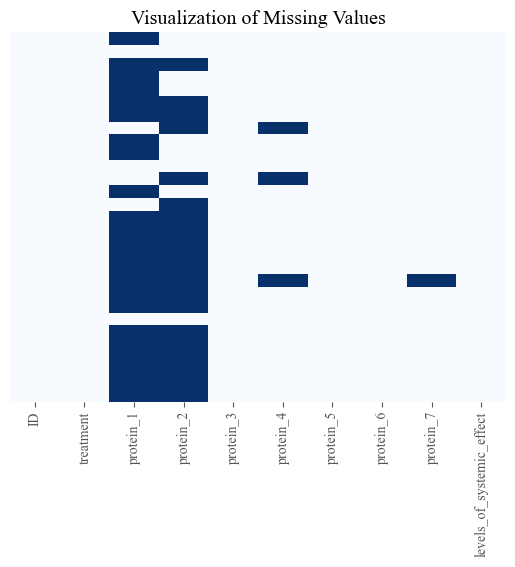

In [43]:
sns.heatmap(model_1_df.isna(), yticklabels=False, cbar=False, cmap='Blues')
plt.title('Visualization of Missing Values');

Since the `protein_1` and `protein_2` columns seem to have a huge percentage of missing values, these columns will be removed, while the two other columns `protein_4` and `protein_7` will be imputed by the group average

### Data Cleaning

1. Removing Columns
2. Imputing Missing Values

In [44]:
model_1_df.drop(columns=['protein_1', 'protein_2'], axis=1, inplace=True)

In [45]:
model_1_df.columns

Index(['ID', 'treatment', 'protein_3', 'protein_4', 'protein_5', 'protein_6',
       'protein_7', 'levels_of_systemic_effect'],
      dtype='object')

In [46]:
model_1_df.isna().sum().sort_values(ascending=False) / len(model_1_df)

protein_4                    0.103448
protein_7                    0.034483
ID                           0.000000
treatment                    0.000000
protein_3                    0.000000
protein_5                    0.000000
protein_6                    0.000000
levels_of_systemic_effect    0.000000
dtype: float64

In [47]:
# getting the numerical column only
df_1_num_var = pt.get_num_var(model_1_df)

# imputing the numerical features with the average by group
model_1_df.query('treatment=="HBP"') 

,ID,treatment,protein_3,protein_4,protein_5,protein_6,protein_7,levels_of_systemic_effect
0,1,HBP,7381.81,42413.36,33016.79,343.61,46520.71,188.083333
1,2,HBP,15257.24,22647.45,32005.41,127.63,26429.48,167.125000
2,3,HBP,9880.76,45078.78,21857.09,121.83,16936.37,189.000000
3,4,HBP,3455.34,7302.61,30633.54,196.96,13542.50,188.625000
4,5,HBP,5031.61,24062.94,21153.38,152.48,23257.93,199.235294
5,6,HBP,13461.31,25068.53,28733.54,125.45,28323.23,196.411765
6,7,HBP,12020.07,19169.06,27017.07,74.00,38345.80,211.750000
7,8,HBP,5133.93,NaN,23440.21,109.55,8306.57,198.125000
8,9,HBP,8552.11,15414.25,30300.64,133.82,15217.41,214.153846
9,10,HBP,10378.04,11157.65,29387.60,168.70,18916.28,189.000000


In [48]:
# imputing by group (treatment)
for col_name, content in model_1_df.items():
    if pd.api.types.is_float_dtype(content):
        print(f'Processing {col_name} ...')
        model_1_df[col_name] = model_1_df[col_name].fillna(model_1_df.groupby('treatment')[col_name].transform('mean'))

Processing protein_3 ...
Processing protein_4 ...
Processing protein_5 ...
Processing protein_6 ...
Processing protein_7 ...
Processing levels_of_systemic_effect ...


In [49]:
model_1_df.isna().sum() 

ID                           0
treatment                    0
protein_3                    0
protein_4                    0
protein_5                    0
protein_6                    0
protein_7                    0
levels_of_systemic_effect    0
dtype: int64

In [50]:
model_1_df.describe()

,ID,protein_3,protein_4,protein_5,protein_6,protein_7,levels_of_systemic_effect
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,10970.561034,26757.895443,34166.189655,153.110345,31486.275887,154.133677
std,8.514693,5653.546752,14274.320708,7684.226889,57.882704,12398.084755,39.219808
min,1.000000,217.010000,5173.800000,21153.380000,74.000000,8306.570000,87.166667
25%,8.000000,7381.810000,14780.510000,28733.540000,120.740000,22557.520000,121.058824
50%,15.000000,11352.460000,24062.940000,34470.350000,145.140000,29060.300000,144.250000
75%,22.000000,14591.290000,39736.390000,40739.320000,174.630000,40608.480000,189.000000
max,29.000000,22569.580000,59843.420000,45773.280000,343.610000,56925.380000,214.153846


In [51]:
model_1_df. \
    groupby('treatment'). \
    describe()


ID                                                 protein_3  \
          count  mean       std   min    25%   50%    75%   max     count   
treatment                                                                   
HBP        14.0   7.5  4.183300   1.0   4.25   7.5  10.75  14.0      14.0   
control    15.0  22.0  4.472136  15.0  18.50  22.0  25.50  29.0      15.0   

                         ...   protein_7           levels_of_systemic_effect  \
                   mean  ...         75%       max                     count   
treatment                ...                                                   
HBP         9519.502143  ...  27849.7925  46520.71                      14.0   
control    12324.882667  ...  43893.0250  56925.38                      15.0   

                                                                      \
                 mean        std         min         25%         50%   
treatment                                                              
HBP        189.021931  18.994775  136.117647  188.203125  189.000000   
control    121.571307  19.700818   87.166667  112.666667  121.058824   

                                   
                  75%         max  
treatment                          
HBP        197.696691  214.153846  
control    134.911765  159.466667  

[2 rows x 56 columns]

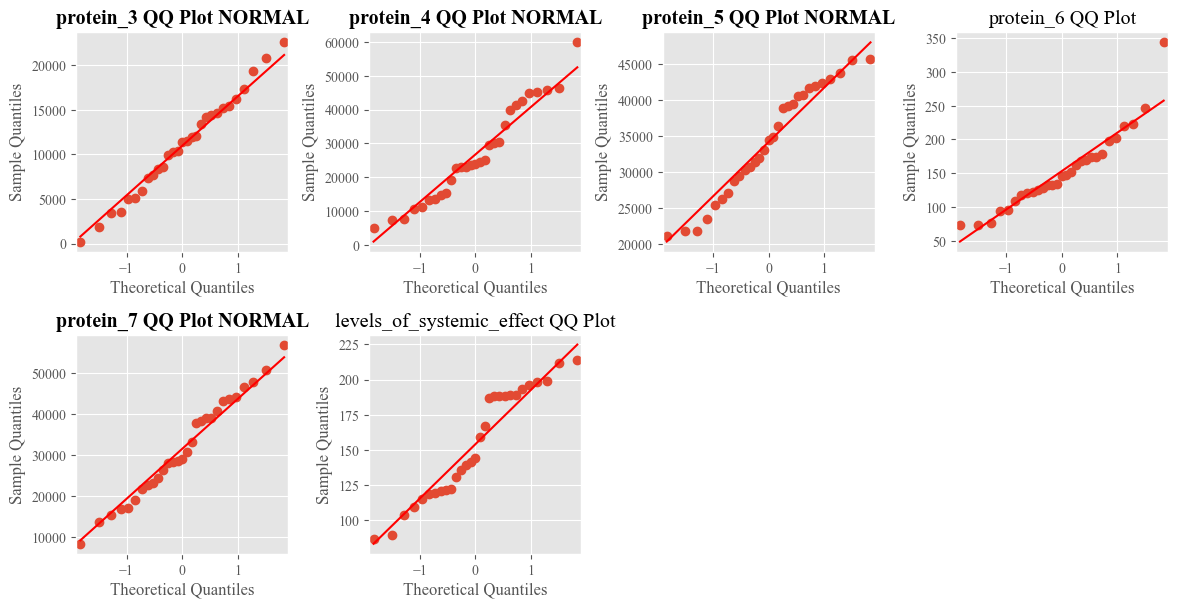

In [52]:
model_1_normal_table = pt.normal_all(model_1_df, 4,3, df_1_num_var, 'treatment')

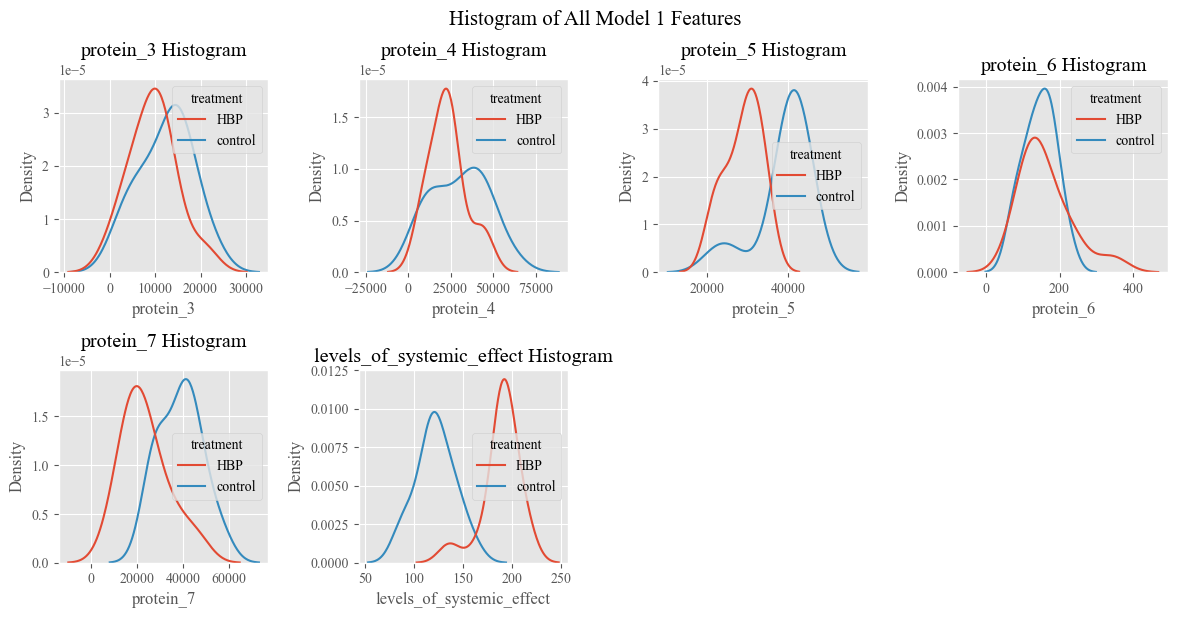

In [53]:
model_1_hist = pt.hist_all(model_1_df, df_1_num_var, 4,3, 'Histogram of All Model 1 Features', 'treatment')

Quickly visualizing the correlation between the numerical features

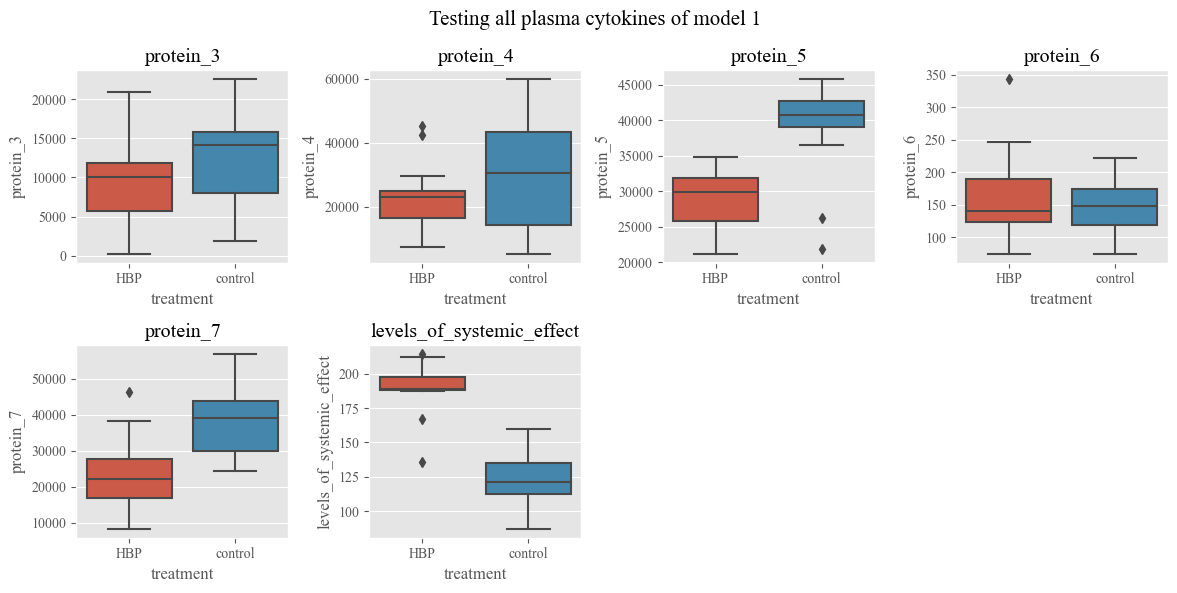

In [54]:
model_1_cytokine_test = pt.test_all(model_1_df, df_1_num_var, 4,2, 'Testing all plasma cytokines of model 1', True, 'treatment')

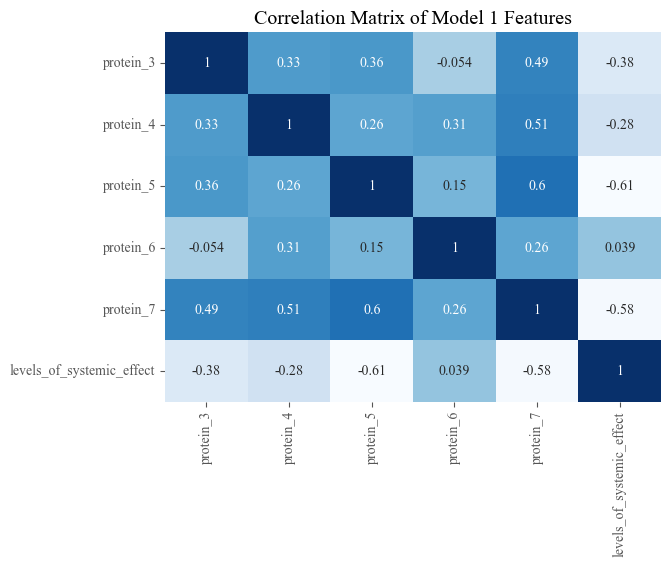

In [55]:
df_1_corr_matrix = model_1_df[df_1_num_var].corr()
sns.heatmap(df_1_corr_matrix, cmap='Blues', cbar=False, annot = True)
plt.title('Correlation Matrix of Model 1 Features');

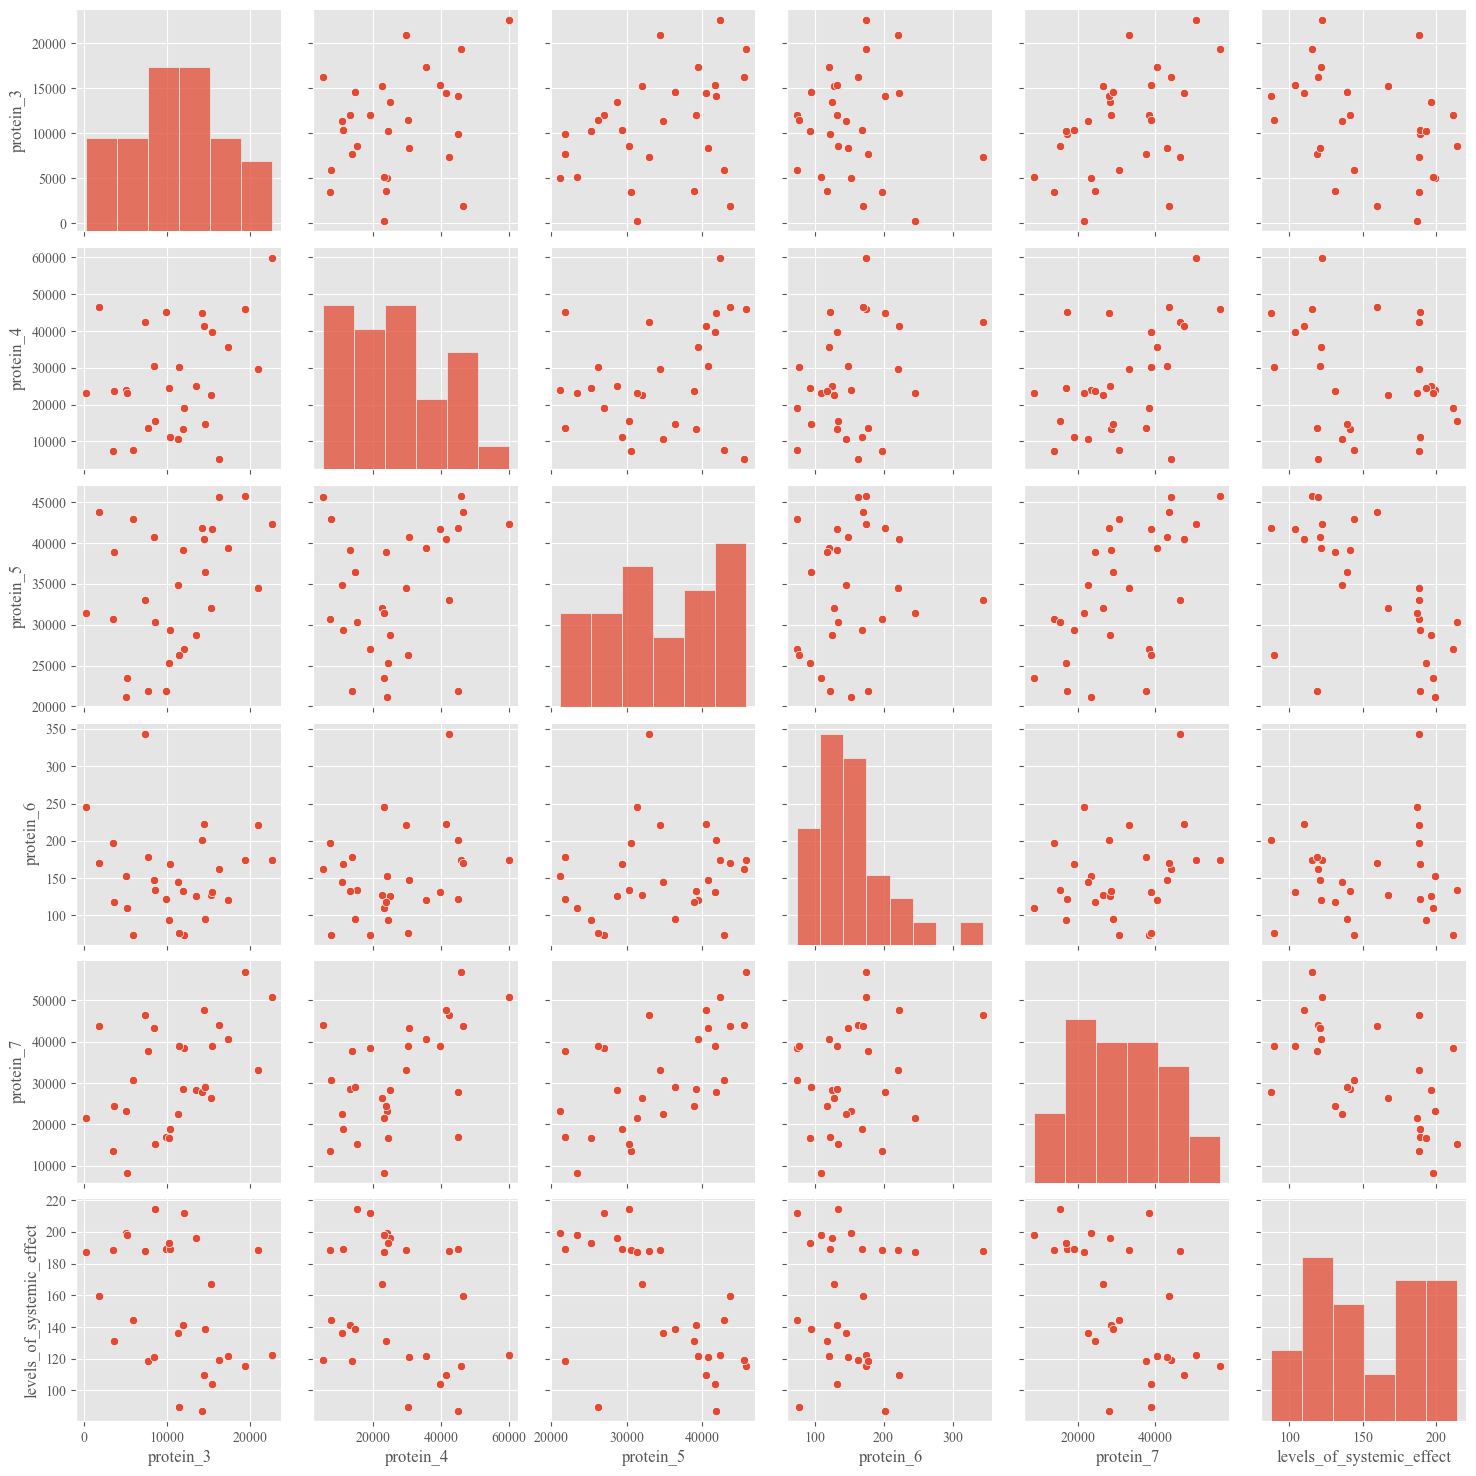

In [56]:
sns.pairplot(model_1_df[df_1_num_var]);

## Clustering: KMeans

An F-Regression is (as defined by sklearn):
> Quick linear model for testing the effect of a single regressor, sequentially for many regressors.
> This is done in 2 steps:
> 1. The cross correlation between each regressor and the target is computed using r_regression as:
> 2. `E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[:, i]) * std(y))` \
> It is converted to an F score and then to a p-value.

In [57]:
# testing the F-regression
model_1_f_reg = model_1_df.copy()
model_1_f_reg.treatment = model_1_f_reg.treatment.map({'HBP':1,
                                                       'control':0})

In [59]:
model_1_f_reg.drop(columns=['levels_of_systemic_effect'], axis=1, inplace = True) 
# dropping the blood pressure column because it is the secondary validation column and a positive control


In [60]:
# getting the numerical columns for the model_1_f_reg
m1_f_reg_num_var = pt.get_num_var(model_1_f_reg)

In [61]:
pt.get_f_regression(model_1_f_reg, m1_f_reg_num_var, 'treatment')

,F statistics,P values
protein_3,1.836303,0.186615
protein_4,1.834443,0.186831
protein_5,23.627130,0.000044
protein_6,0.544520,0.466931
protein_7,17.624193,0.000262


Looking at the F-statistics and P values, it looks like the `sICAM` and `Thrombomodulin` might both be highly relevant to blood pressure phenotype.

### KMeans

In [62]:
model_1_df.shape

(29, 8)

In [64]:
# creating a working df for clustering
model_1_clust = model_1_df.copy()
model_1_clust.drop('levels_of_systemic_effect', axis=1, inplace = True) # removing the blood pressure column for validation

### Scaling the features:

In [65]:
# creating a new dataframe
model_1_clust_num = model_1_clust[pt.get_num_var(model_1_clust)]

# using the MinMaxScaler for the normalization
scaler_model_1 = MinMaxScaler()
model_1_clust_scaled = scaler_model_1.fit_transform(model_1_clust_num)

model_1_clust_scaled_df = pd.DataFrame(model_1_clust_scaled, columns=model_1_clust_num.columns)
model_1_clust_scaled_df.head()


,protein_3,protein_4,protein_5,protein_6,protein_7
0,0.320536,0.681175,0.481863,1.000000,0.785995
1,0.672864,0.319623,0.440783,0.198917,0.372755
2,0.432333,0.729930,0.028583,0.177404,0.177499
3,0.144875,0.038940,0.385061,0.456066,0.107694
4,0.215394,0.345514,0.000000,0.291087,0.307522


In [66]:
# adding back the ID and Treatment column
model_1_clust_scaled_df['ID'] = model_1_df['ID']
model_1_clust_scaled_df['treatment'] = model_1_df['treatment']

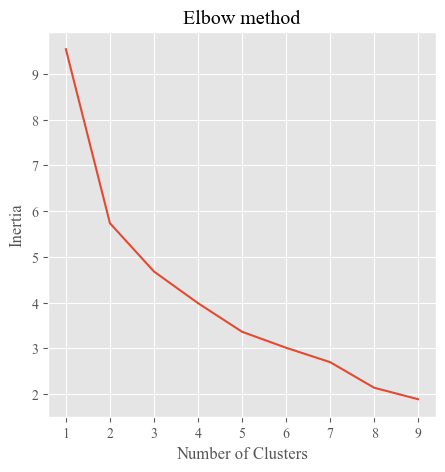

In [67]:
# using the elbow method to estimate the number of clusters
pt.get_elbow(model_1_clust_scaled_df[pt.get_num_var(model_1_clust_scaled_df)])

In [68]:
# separating X and y
X_model_1 = model_1_clust_scaled_df.drop(columns=['ID', 'treatment'], axis=1)
y_model_1 = model_1_clust_scaled_df.treatment

# fitting the KMeans clustering model
kmeans_model_1 = KMeans(n_clusters=2, random_state=42, init='k-means++')
kmeans_1 = kmeans_model_1.fit(X_model_1)

# creating a new feature and getting the KMeans clusters label
model_1_clust_scaled_df['clusters'] = kmeans_1.labels_
model_1_clust_scaled_df.head()

,protein_3,protein_4,protein_5,protein_6,protein_7,ID,treatment,clusters
0,0.320536,0.681175,0.481863,1.000000,0.785995,1,HBP,1
1,0.672864,0.319623,0.440783,0.198917,0.372755,2,HBP,0
2,0.432333,0.729930,0.028583,0.177404,0.177499,3,HBP,0
3,0.144875,0.038940,0.385061,0.456066,0.107694,4,HBP,0
4,0.215394,0.345514,0.000000,0.291087,0.307522,5,HBP,0


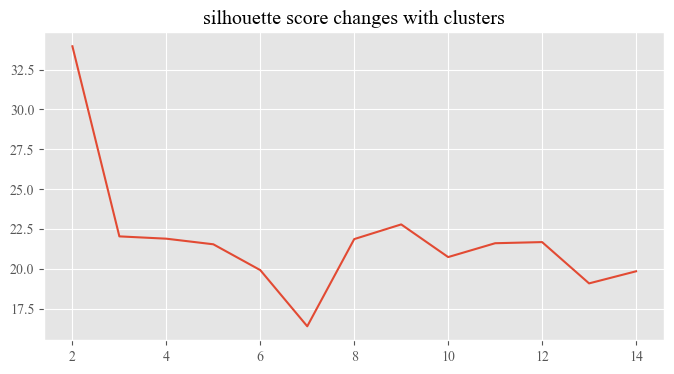

In [69]:
# using the silhouette method for quantifying results of the elbow methods
kmeans_clust = np.arange(2,15)
kmeans_score = []

for clust in kmeans_clust:
    kmeans = KMeans(n_clusters=clust, init='k-means++', random_state=42)
    kmeans_fit = kmeans.fit(X_model_1)
    kmeans_score.append(silhouette_score(X_model_1, kmeans_fit.labels_)*100)
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.lineplot(x = kmeans_clust, y=kmeans_score)
plt.title('silhouette score changes with clusters');


Combined with the output of the elbow method; Seeing how this metric declines with increasing clusters we can safe to say that the optimal number of clusters detected at least with the KMeans clustering model is 2 (although the score is only at ~ `34%`)

In [71]:
# looking at cluster 1:
model_1_clust_scaled_df.query("clusters==0")

,protein_3,protein_4,protein_5,protein_6,protein_7,ID,treatment,clusters
1,0.672864,0.319623,0.440783,0.198917,0.372755,2,HBP,0
2,0.432333,0.729930,0.028583,0.177404,0.177499,3,HBP,0
3,0.144875,0.038940,0.385061,0.456066,0.107694,4,HBP,0
4,0.215394,0.345514,0.000000,0.291087,0.307522,5,HBP,0
5,0.592518,0.363908,0.307888,0.190831,0.411706,6,HBP,0
6,0.528040,0.255997,0.238169,0.000000,0.617852,7,HBP,0
7,0.219971,0.327826,0.092885,0.131857,0.000000,8,HBP,0
8,0.372892,0.187315,0.371539,0.221876,0.142143,9,HBP,0
9,0.454580,0.109455,0.334454,0.351248,0.218222,10,HBP,0
11,0.000000,0.327826,0.416459,0.637513,0.272801,12,HBP,0


In [72]:
model_1_clust_scaled_df.query('clusters==1')

,protein_3,protein_4,protein_5,protein_6,protein_7,ID,treatment,clusters
0,0.320536,0.681175,0.481863,1.000000,0.785995,1,HBP,1
10,0.924063,0.447559,0.540903,0.543674,0.510976,11,HBP,1
14,1.000000,1.000000,0.860929,0.371870,0.872659,15,control,1
16,0.765899,0.554705,0.742285,0.173362,0.664391,17,control,1
18,0.622991,0.726453,0.841972,0.472683,0.403404,19,control,1
20,0.678778,0.632208,0.835516,0.215088,0.632131,21,control,1
21,0.635060,0.663714,0.786747,0.550647,0.809673,22,control,1
22,0.854218,0.743828,1.000000,0.373243,1.000000,23,control,1
23,0.717850,0.000000,0.992160,0.329328,0.735742,24,control,1
25,0.074368,0.754244,0.917179,0.356738,0.728155,26,control,1


## Statistical Testing:
### Hypothesis Testing blood pressure output by clustering

In [73]:
# adding back the blood_pressure column
model_1_clust_scaled_df['levels_of_systemic_effect'] = model_1_df['levels_of_systemic_effect']


# mean of each clusters based on the blood pressure
model_1_clust_mean_0 = np.mean(model_1_clust_scaled_df.query('clusters==0')['levels_of_systemic_effect'])
model_1_clust_mean_1 = np.mean(model_1_clust_scaled_df.query('clusters==1')['levels_of_systemic_effect'])

In [74]:
print(f'Systemic Effect of Cluster 0 is {model_1_clust_mean_0}\nSystemic Effect of Cluster 1 is {model_1_clust_mean_1}')

Systemic Effect of Cluster 0 is 168.51009930111113
Systemic Effect of Cluster 1 is 130.6086229881818


Looking at the clusters, we see that the two clusters have a distinctly different blood pressure readout, so I will test the significance between the two and visualize the differences

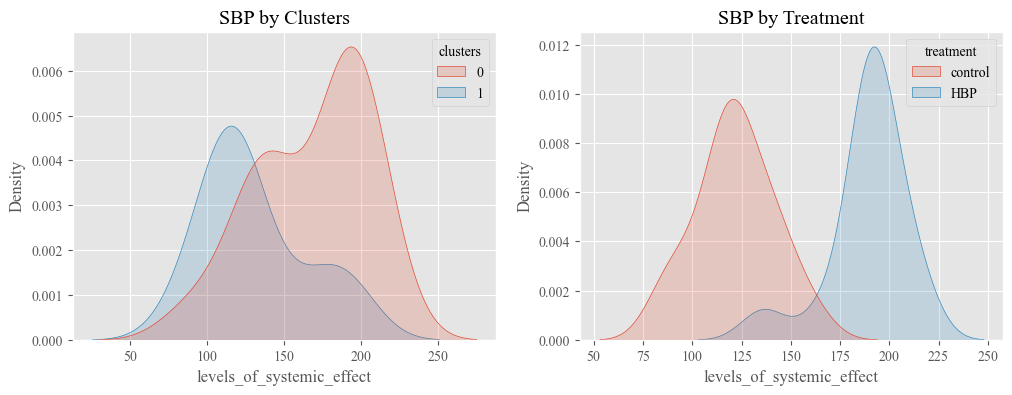

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
sns.kdeplot(ax = ax1, x = model_1_clust_scaled_df['levels_of_systemic_effect'], hue=model_1_clust_scaled_df['clusters'], fill = True, alpha = 0.2)
ax1.set(title = 'SBP by Clusters');

sns.kdeplot(ax = ax2, x = model_1_clust_scaled_df['levels_of_systemic_effect'], hue=model_1_clust_scaled_df['treatment'], hue_order=['control','HBP'], fill = True, alpha = 0.2)
ax2.set(title = 'SBP by Treatment');

Here we can see that the distribution of points separated by treatment (in the second plot, by treatment) is detectable by the clustering method as well.

In [76]:
# running the t.test:
X = model_1_clust_scaled_df.query('clusters==0')['levels_of_systemic_effect']
y = model_1_clust_scaled_df.query('clusters==1')['levels_of_systemic_effect']
t_stat, p_val = ttest_ind(X, y, equal_var=False)
print(f'Non-parametric t-test results: \nThe test statistics is: {t_stat} \nand the p_value is {p_val}')

Non-parametric t-test results: 
The test statistics is: 2.8775295879533678 
and the p_value is 0.008594009606615901


### Since the p_value is less than the 0.05 alpha value we can reject the null hypothesis ('There is no difference between the groups/clusters')

## Visualization using PCA Analysis

First looking at the two dimensional analysis of each of the features independently

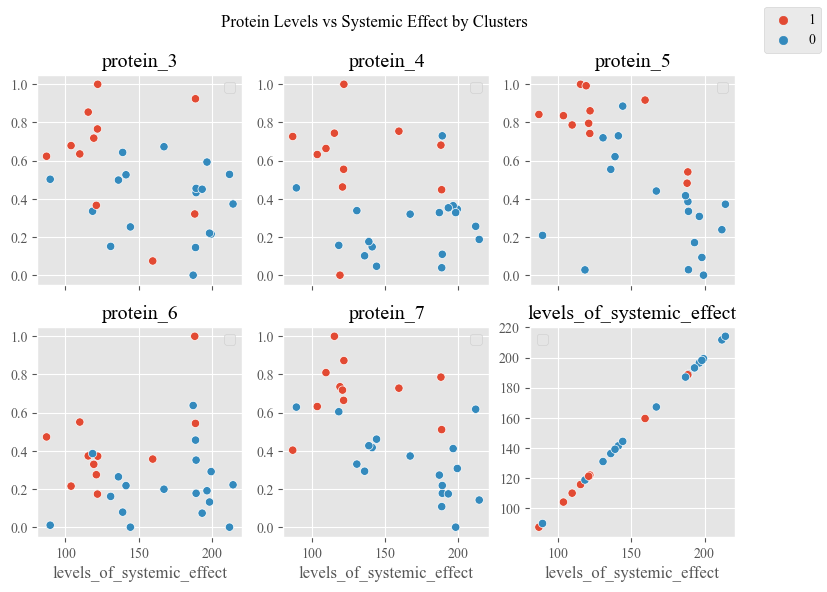

In [77]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(3*3,2*3), sharex=True)
for col, ax in zip(pt.get_num_var(model_1_clust_scaled_df), np.ravel(ax)):
    sns.scatterplot(ax= ax, data=model_1_clust_scaled_df, x = 'levels_of_systemic_effect', y = col, hue= 'clusters', hue_order=[1,0])
    ax.set(ylabel=None, title = col)
    ax.legend([])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');
fig.suptitle('Protein Levels vs Systemic Effect by Clusters');

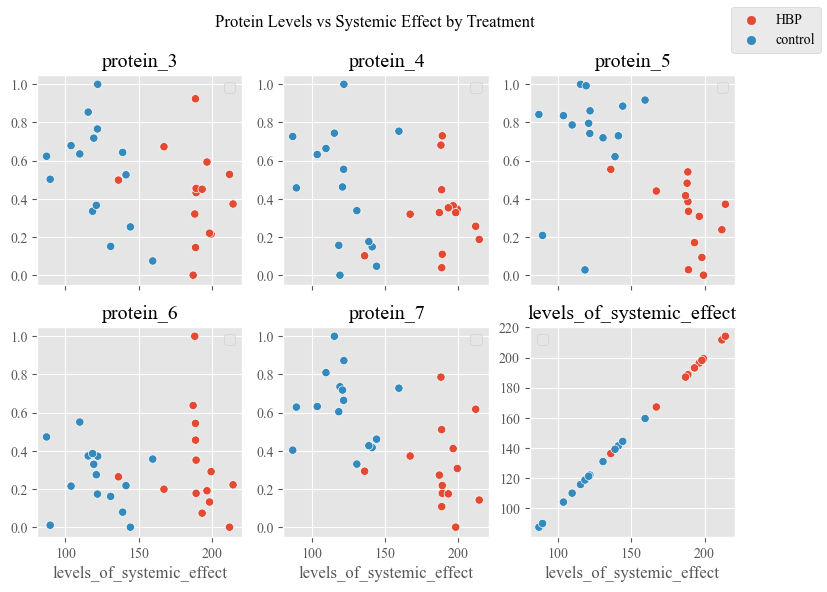

In [78]:
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(3*3,2*3), sharex=True)
for col, ax in zip(pt.get_num_var(model_1_clust_scaled_df), np.ravel(ax)):
    sns.scatterplot(ax= ax, data=model_1_clust_scaled_df, x = 'levels_of_systemic_effect', y = col, hue= 'treatment')
    ax.set(ylabel=None, title = col)
    ax.legend([])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');
fig.suptitle('Protein Levels vs Systemic Effect by Treatment');

Comparing these two figures, we can see some stark similarities in how the clustering algorithm is detecting the treatment groups. Next lets combine the features and perform a dimensionality reduction for visualization!

In [79]:
# getting the X dataframe
X_1_num_var = pt.get_num_var(model_1_clust_scaled_df.drop('levels_of_systemic_effect', axis =1))
X_1_pca = model_1_clust_scaled_df[X_1_num_var] # already normalized X values

# instantiating the PCA model
pca_1 = PCA(n_components=2, random_state=42)

# fitting the model using the scaled dataset
principalComponents_1 = pca_1.fit_transform(X_1_pca)
principalDF_1 = pd.DataFrame(principalComponents_1, columns=['pca1', 'pca2'])

principalDF_1['clusters'] = model_1_clust_scaled_df['clusters']
principalDF_1['treatment'] = model_1_clust_scaled_df['treatment']

principalDF_1

,pca1,pca2,clusters,treatment
0,0.298557,0.589229,1,HBP
1,-0.079796,-0.077119,0,HBP
2,-0.369009,0.434002,0,HBP
3,-0.533796,-0.073999,0,HBP
4,-0.538917,0.274914,0,HBP
5,-0.155468,0.034420,0,HBP
6,-0.186682,-0.067703,0,HBP
7,-0.675647,0.116408,0,HBP
8,-0.411647,-0.098852,0,HBP
9,-0.373473,-0.076170,0,HBP


Next we will check the explained variance ratio:
> The explained variance ratio of a principal component is equal to the ratio of its eigenvalue to the sum of the eigenvalues of all the principal components.



In [80]:
# checking the data loss using variance ratio:
print(f'The Cumulative variance explained by 2 principal components is: {np.sum(pca_1.explained_variance_ratio_)*100}%')

The Cumulative variance explained by 2 principal components is: 69.22311665687722%


This means we have `69.22%` of our original data considered after PCA! 

Next we can try to find the importance features with PCA:

In [81]:
pca_features = pd.DataFrame(abs(pca_1.components_), columns = X_1_num_var, index = ['PCA1', 'PCA2'])
pca_features

,protein_3,protein_4,protein_5,protein_6,protein_7
PCA1,0.388833,0.402880,0.61530,0.155102,0.532772
PCA2,0.119390,0.682399,0.54781,0.463963,0.068706


This validates the positive effects of `levels_of_systemic_effect` as a validation metrics

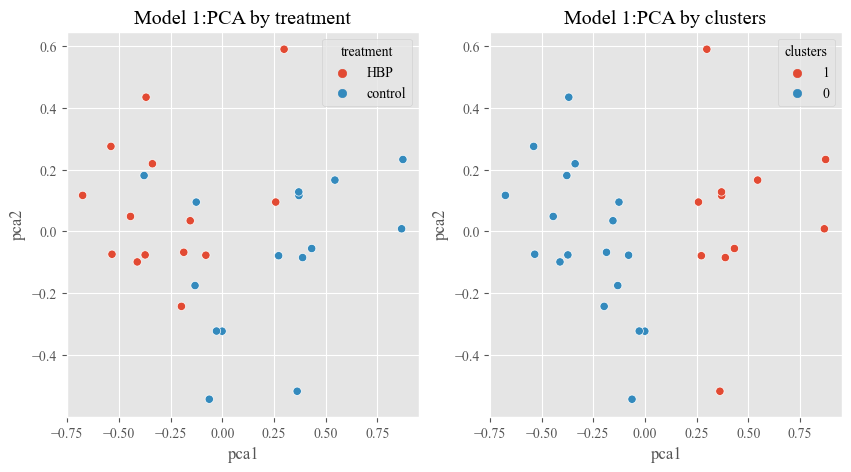

In [82]:
# visualization of Principal component analysis
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(ax=ax1, data=principalDF_1, x = 'pca1', y='pca2', hue='treatment')
ax1.set(title='Model 1:PCA by treatment')
sns.scatterplot(ax=ax2, data=principalDF_1, x=  'pca1', y='pca2', hue = 'clusters', hue_order=[1,0])
ax2.set(title = 'Model 1:PCA by clusters');

**The PCA results show high clustering accuracy between the actual treatment groups compared to the "artificially" created clustering labels with KMeans**

## Next including the `levels_of_systemic_effect` feature to see its effect on PCA

In [83]:
# getting the X dataframe
X_1_num_var = pt.get_num_var(model_1_clust_scaled_df)
X_1_pca = model_1_clust_scaled_df[X_1_num_var] # already normalized X values

# instantiating the PCA model
pca_1 = PCA(n_components=2, random_state=42)

# fitting the model using the scaled dataset
principalComponents_1 = pca_1.fit_transform(X_1_pca)
principalDF_1 = pd.DataFrame(principalComponents_1, columns=['pca1', 'pca2'])

principalDF_1['clusters'] = model_1_clust_scaled_df['clusters']
principalDF_1['treatment'] = model_1_clust_scaled_df['treatment']

principalDF_1

,pca1,pca2,clusters,treatment
0,-33.947927,0.669896,1,HBP
1,-12.991490,-0.016597,0,HBP
2,-34.868513,-0.039310,0,HBP
3,-34.494108,-0.310028,0,HBP
4,-45.104484,-0.180852,0,HBP
5,-42.278174,0.107300,0,HBP
6,-57.615929,0.120514,0,HBP
7,-43.994912,-0.360893,0,HBP
8,-60.021413,-0.062345,0,HBP
9,-34.868025,-0.157170,0,HBP


In [84]:
# checking the data loss using variance ratio:
print(f'The Cumulative variance explained by 2 principal components is: {np.sum(pca_1.explained_variance_ratio_)*100}%')

The Cumulative variance explained by 2 principal components is: 99.98974753774897%


In [85]:
pca_features = pd.DataFrame(abs(pca_1.components_), columns = X_1_num_var, index = ['PCA1', 'PCA2'])
pca_features

,protein_3,protein_4,protein_5,protein_6,protein_7,levels_of_systemic_effect
PCA1,0.002419,0.001869,0.004831,0.000212,0.003760,0.999977
PCA2,0.371620,0.550069,0.444297,0.339742,0.496451,0.005868


Here we see that the variance ratio is now ~ `100%`  with the  `levels_of_systemic_effect` column included! Meaning this is a great positive readout as a model validation metric!

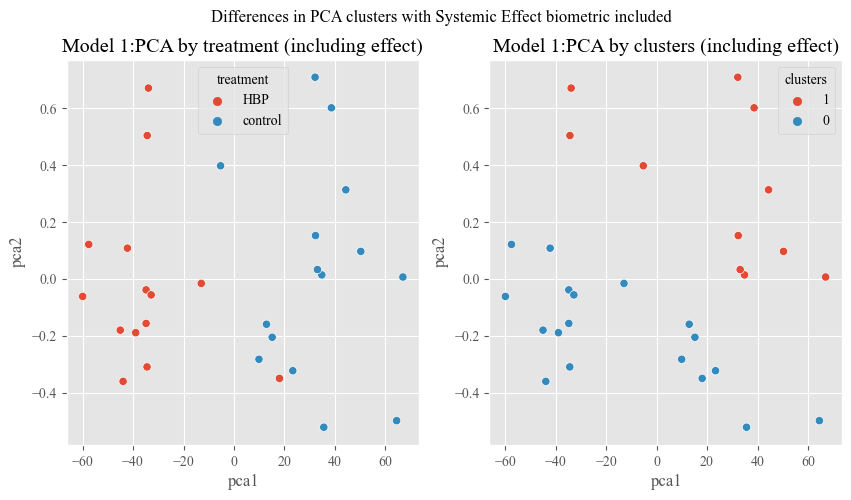

In [86]:
# visualization of Principal component analysis
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(ax=ax1, data=principalDF_1, x = 'pca1', y='pca2', hue='treatment')
ax1.set(title='Model 1:PCA by treatment (including effect)')
sns.scatterplot(ax=ax2, data=principalDF_1, x=  'pca1', y='pca2', hue = 'clusters', hue_order=[1,0])
ax2.set(title = 'Model 1:PCA by clusters (including effect)')
fig.suptitle('Differences in PCA clusters with Systemic Effect biometric included');

## Trying UMAP (a different dimensionality reduction approach)

In [87]:
X_1_num_var = pt.get_num_var(model_1_clust_scaled_df.drop('levels_of_systemic_effect', axis =1))
X_1_umap = model_1_clust_scaled_df[X_1_num_var]

umap_1 = umap.UMAP(random_state=42)

# fitting the umap instance
umap_fit = umap_1.fit_transform(X_1_umap)

umap_fit.shape

(29, 2)

In [88]:
# adding in the clusters
umap_df = pd.DataFrame(umap_fit, columns = ['UMAP1', 'UMAP2'])
umap_df['treatment'] = model_1_clust_scaled_df['treatment']
umap_df['clusters'] = model_1_clust_scaled_df['clusters']

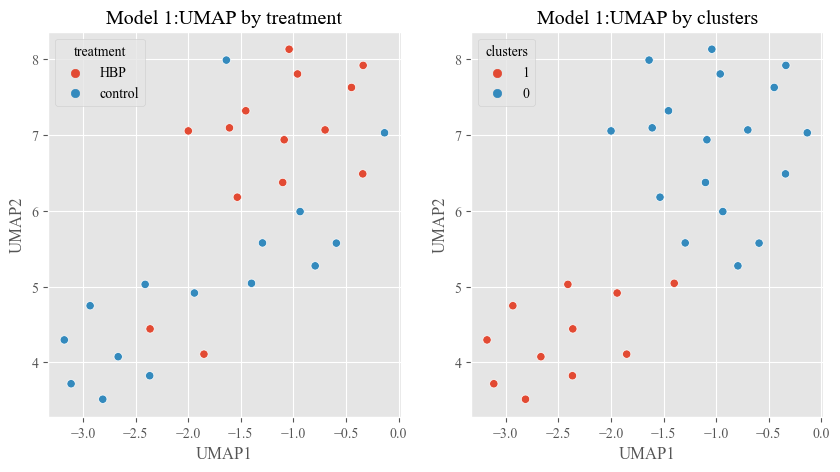

In [89]:
# visualization of UMAP
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(ax=ax1, data=umap_df, x = 'UMAP1', y='UMAP2', hue='treatment')
ax1.set(title='Model 1:UMAP by treatment')
sns.scatterplot(ax=ax2, data=umap_df, x=  'UMAP1', y='UMAP2', hue = 'clusters', hue_order=[1,0])
ax2.set(title = 'Model 1:UMAP by clusters');

Comparing the output of the UMAP and PCA, it looks like both these models seem to be doing an okay job at dimensionality reduction of this small dataset of plasma proteins (as validated by the comparison of the true labels (treatment) and predicted labels (clusters). 

---
<h2 align='center'>Model 2 Clustering<a name='4'></a></h2>

## Looking at the Plasma protein from the second validation model (autoimmune type):
### Cleaning the Data:

In [91]:
# importing the file for the brain cytokine analysis
model_2_df = pd.read_csv('model_2_plasma_joined.csv')

In [92]:
model_2_df.columns

Index(['ID', 'treatment', 'protein_1', 'protein_2', 'protein_3', 'protein_4',
       'protein_5', 'protein_6', 'protein_7', 'protein_8', 'protein_9',
       'protein_10', 'protein_11', 'protein_12', 'protein_13', 'protein_14',
       'protein_15', 'protein_16', 'protein_17', 'protein_18',
       'nuclear_effect', 'kidney_effect'],
      dtype='object')

In [93]:
model_2_df.head()

,ID,treatment,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,...,protein_11,protein_12,protein_13,protein_14,protein_15,protein_16,protein_17,protein_18,nuclear_effect,kidney_effect
0,mouse_1,Sick,46.38,2.77,492.51,4.47,37.01,0.71,22.09,19.97,...,82.41,102.58,4.45,1758.97,53.97,236.90,64.90,74.46,33378.15914,0.2015
1,mouse_2,Sick,55.66,104.41,617.39,7.47,6.77,0.78,113.55,29.00,...,35.84,152.06,2.84,1625.69,NaN,97.08,36.53,51.89,30187.66207,0.1525
2,mouse_3,Sick,80.73,1.19,172.88,6.02,192.45,1.68,15.28,22.21,...,35.20,35.75,8.49,1471.81,32.09,31.01,49.91,56.59,52030.88789,0.1300
3,mouse_4,Sick,82.01,0.95,520.96,2.36,NaN,0.41,52.61,36.23,...,18.76,116.08,13.50,3598.90,NaN,464.74,55.37,68.06,NaN,0.1410
4,mouse_5,Sick,14.51,3.02,158.06,3.80,370.11,0.26,78.60,5.87,...,385.66,248.94,33.28,1328.78,0.99,90.38,138.44,42.49,16081.34255,0.0955


In [94]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              44 non-null     object 
 1   treatment       44 non-null     object 
 2   protein_1       44 non-null     float64
 3   protein_2       44 non-null     float64
 4   protein_3       44 non-null     float64
 5   protein_4       43 non-null     float64
 6   protein_5       31 non-null     float64
 7   protein_6       44 non-null     float64
 8   protein_7       44 non-null     float64
 9   protein_8       44 non-null     float64
 10  protein_9       44 non-null     float64
 11  protein_10      44 non-null     float64
 12  protein_11      44 non-null     float64
 13  protein_12      43 non-null     float64
 14  protein_13      44 non-null     float64
 15  protein_14      44 non-null     float64
 16  protein_15      42 non-null     float64
 17  protein_16      44 non-null     float

In [95]:
model_2_df.isna().sum().sort_values(ascending=False) / len(model_2_df)

nuclear_effect    0.295455
protein_5         0.295455
kidney_effect     0.090909
protein_15        0.045455
protein_4         0.022727
protein_12        0.022727
protein_11        0.000000
protein_18        0.000000
protein_17        0.000000
protein_16        0.000000
protein_14        0.000000
protein_13        0.000000
ID                0.000000
treatment         0.000000
protein_9         0.000000
protein_8         0.000000
protein_7         0.000000
protein_6         0.000000
protein_3         0.000000
protein_2         0.000000
protein_1         0.000000
protein_10        0.000000
dtype: float64

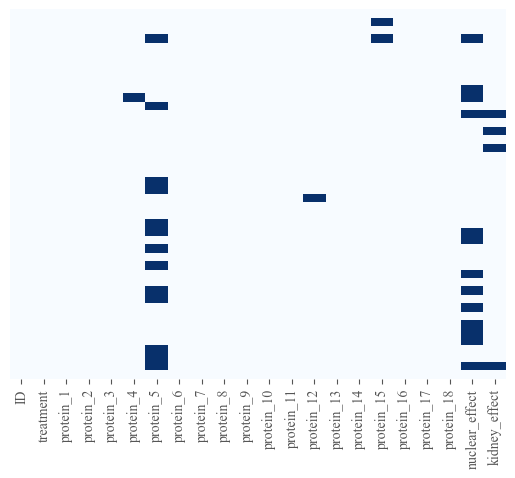

In [96]:
# Visualization of missing values in the dataset:
sns.heatmap(model_2_df.isna(), yticklabels=False, cbar=False, cmap='Blues');

In [97]:
model_2_df.query('treatment=="Sick"').isna().sum()

ID                0
treatment         0
protein_1         0
protein_2         0
protein_3         0
protein_4         1
protein_5         2
protein_6         0
protein_7         0
protein_8         0
protein_9         0
protein_10        0
protein_11        0
protein_12        0
protein_13        0
protein_14        0
protein_15        2
protein_16        0
protein_17        0
protein_18        0
nuclear_effect    4
kidney_effect     3
dtype: int64

In [98]:
model_2_df.query('treatment=="Control"').isna().sum()

ID                 0
treatment          0
protein_1          0
protein_2          0
protein_3          0
protein_4          0
protein_5         11
protein_6          0
protein_7          0
protein_8          0
protein_9          0
protein_10         0
protein_11         0
protein_12         1
protein_13         0
protein_14         0
protein_15         0
protein_16         0
protein_17         0
protein_18         0
nuclear_effect     9
kidney_effect      1
dtype: int64

Because there are 11 `Control` samples with missing values I cannot simply remove them with `axis = 0`, I will impute those missing values

In [99]:
# imputing by group (treatment)
for col_name, content in model_2_df.items():
    if pd.api.types.is_float_dtype(content) and model_2_df[col_name].isna().sum() > 0:
        print(f'Processing {col_name} ...')
        model_2_df[col_name] = model_2_df[col_name].fillna(model_2_df.groupby('treatment')[col_name].transform('mean'))

Processing protein_4 ...
Processing protein_5 ...
Processing protein_12 ...
Processing protein_15 ...
Processing nuclear_effect ...
Processing kidney_effect ...


In [100]:
model_2_df.isna().sum()

ID                0
treatment         0
protein_1         0
protein_2         0
protein_3         0
protein_4         0
protein_5         0
protein_6         0
protein_7         0
protein_8         0
protein_9         0
protein_10        0
protein_11        0
protein_12        0
protein_13        0
protein_14        0
protein_15        0
protein_16        0
protein_17        0
protein_18        0
nuclear_effect    0
kidney_effect     0
dtype: int64

## Exploring the Numerical Features:

In [101]:
# getting list of numerical features
df_2_num_var = pt.get_num_var(model_2_df)

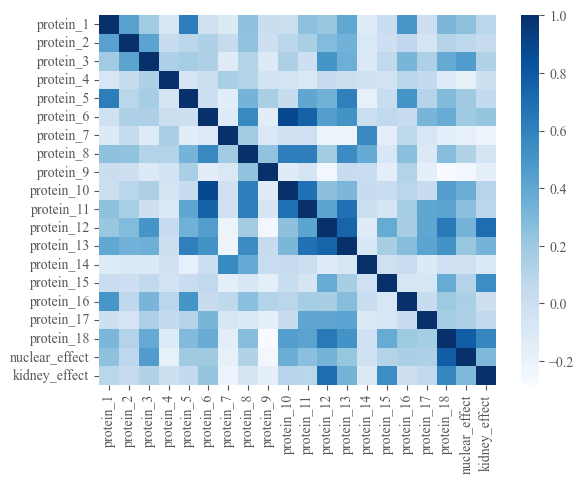

In [102]:
df_2_corr = model_2_df[df_2_num_var].corr()
sns.heatmap(df_2_corr, annot = False, cmap = 'Blues');

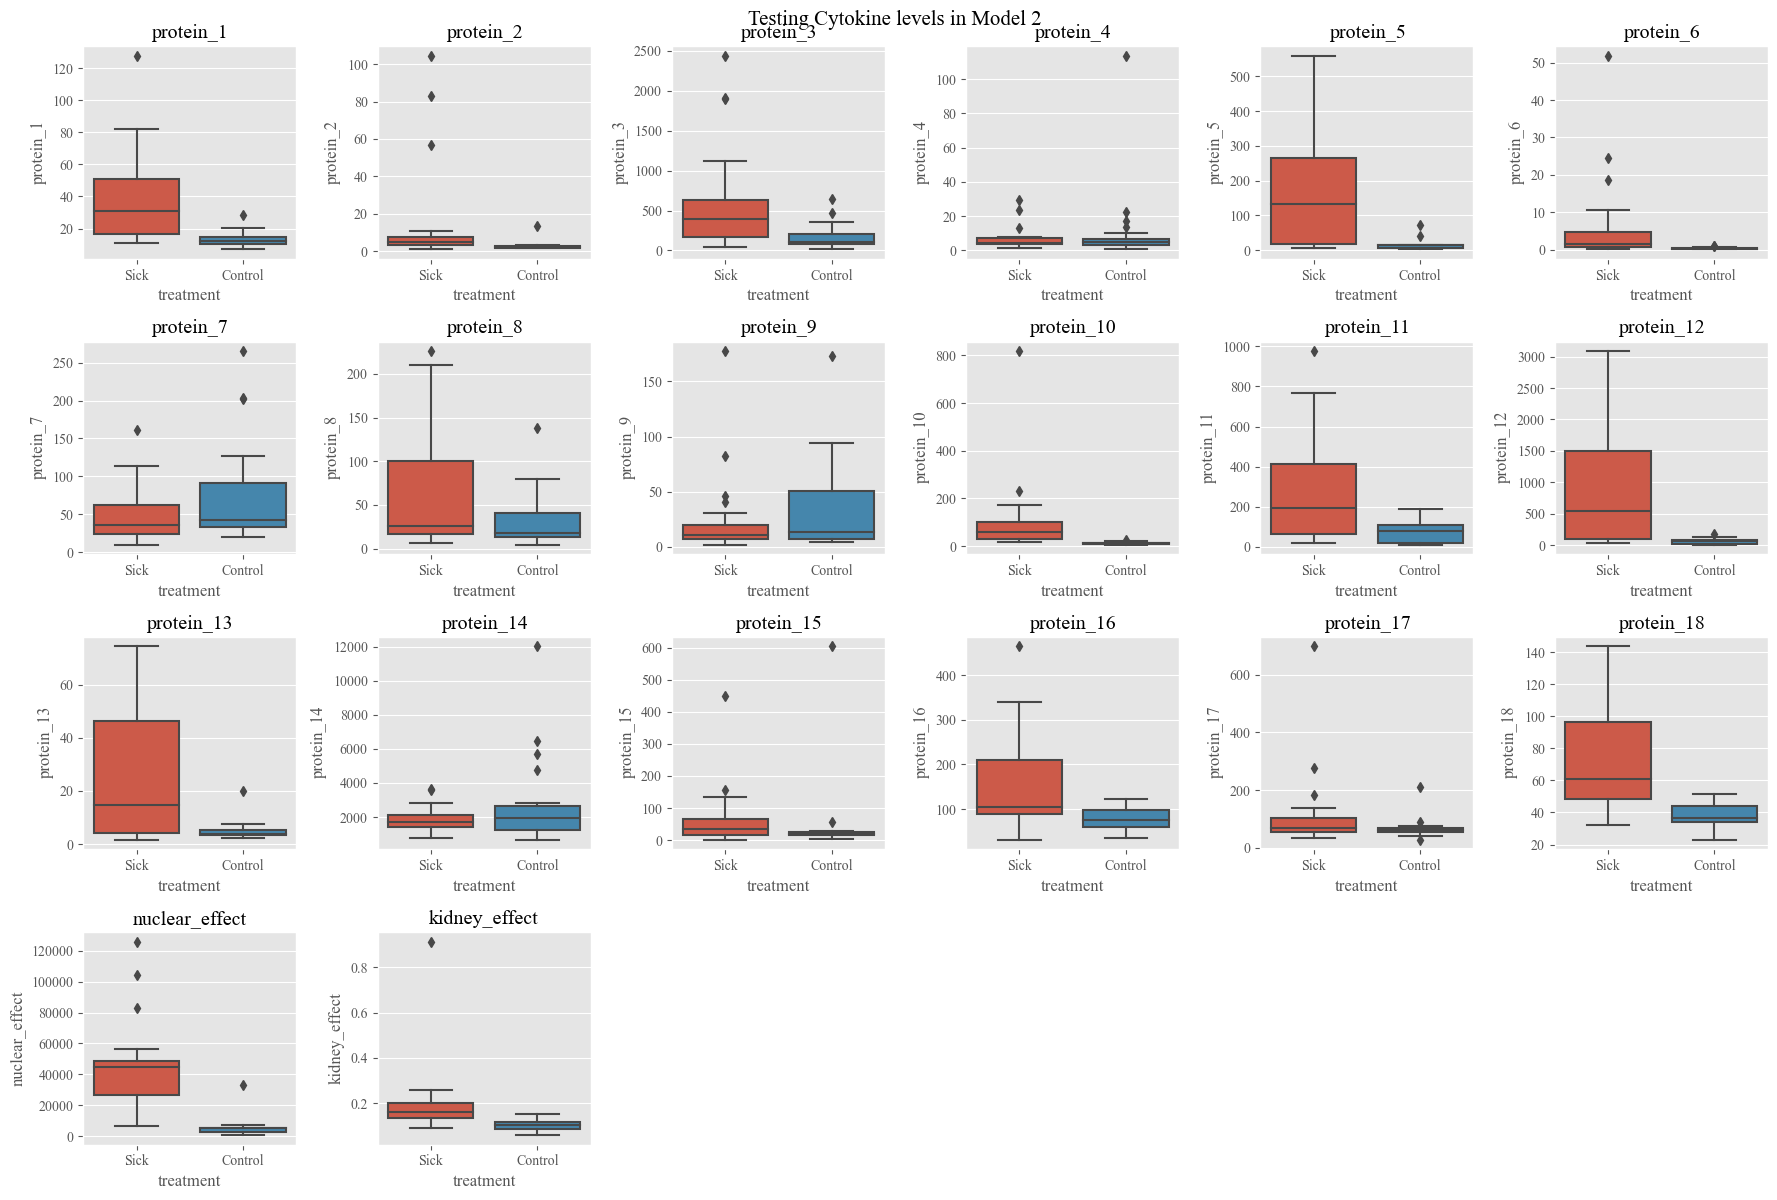

In [103]:
model_2_cytokine_test = pt.test_all(model_2_df, df_2_num_var, 6, 6,'Testing Cytokine levels in Model 2', True, 'treatment')

### Clustering: Model 2 Plasma Proteins


In [104]:
# testing the F-regression
model_2_f_reg = model_2_df.copy()
model_2_f_reg.treatment = model_2_f_reg.treatment.map({'Sick':1,
                                                       'Control':0})

In [105]:
pt.get_f_regression(model_2_f_reg, df_2_num_var, 'treatment')

,F statistics,P values
protein_1,17.544306,0.000141
protein_2,4.801237,0.034038
protein_3,10.858501,0.002004
protein_4,0.477819,0.493215
protein_5,18.048582,0.000117
protein_6,6.026080,0.018320
protein_7,2.287855,0.137879
protein_8,3.557671,0.066198
protein_9,0.526873,0.471950
protein_10,7.138281,0.010693


### KMeans Clustering: Model 2

In [106]:
# creating a new working copy for the clustering portion
model_2_clust = model_2_df.copy()

In [107]:
# removing the columns that should not be scaled / normalized
model_2_clust.drop(columns=['nuclear_effect', 'kidney_effect'], axis = 1, inplace=True) # removing the validation columns
model_2_clust_num_var = pt.get_num_var(model_2_clust)

# creating a new dataframe
model_2_clust_num = model_2_clust[model_2_clust_num_var]

# using the MinMaxScaler for the normalization
scaler_model_2 = MinMaxScaler()
model_2_clust_scaled = scaler_model_2.fit_transform(model_2_clust_num)

model_2_clust_scaled_df = pd.DataFrame(model_2_clust_scaled, columns=model_2_clust_num.columns)
model_2_clust_scaled_df.head()


,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10,protein_11,protein_12,protein_13,protein_14,protein_15,protein_16,protein_17,protein_18
0,0.326412,0.017876,0.197334,0.034495,0.062283,0.011610,0.046600,0.069522,0.073420,0.070196,0.073073,0.029336,0.038668,0.096684,0.087961,0.474696,0.055854,0.426725
1,0.403488,1.000000,0.248968,0.061030,0.007896,0.012964,0.405661,0.110313,0.251268,0.036325,0.024749,0.045442,0.016513,0.084940,0.106805,0.152330,0.013587,0.239748
2,0.611711,0.002609,0.065176,0.048204,0.341846,0.030379,0.019865,0.079640,0.036368,0.030591,0.024085,0.007584,0.094262,0.071381,0.051635,0.000000,0.033521,0.278684
3,0.622342,0.000290,0.209097,0.015832,0.313459,0.005805,0.166418,0.142973,0.070911,0.027546,0.007025,0.033731,0.163204,0.258810,0.106805,1.000000,0.041655,0.373706
4,0.061711,0.020292,0.059048,0.028569,0.661373,0.002902,0.268452,0.005827,0.053583,0.038014,0.387749,0.076975,0.435393,0.058777,0.000000,0.136882,0.165415,0.161876


In [108]:
# adding back the columns
model_2_clust_scaled_df['ID'] = model_2_clust['ID']
model_2_clust_scaled_df['treatment'] = model_2_clust['treatment']
model_2_clust_scaled_df['nuclear_effect'] = model_2_df['nuclear_effect']
model_2_clust_scaled_df['kidney_effect'] = model_2_df['kidney_effect']

In [109]:
model_2_clust_scaled_df.head()

,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10,...,protein_13,protein_14,protein_15,protein_16,protein_17,protein_18,ID,treatment,nuclear_effect,kidney_effect
0,0.326412,0.017876,0.197334,0.034495,0.062283,0.011610,0.046600,0.069522,0.073420,0.070196,...,0.038668,0.096684,0.087961,0.474696,0.055854,0.426725,mouse_1,Sick,33378.15914,0.2015
1,0.403488,1.000000,0.248968,0.061030,0.007896,0.012964,0.405661,0.110313,0.251268,0.036325,...,0.016513,0.084940,0.106805,0.152330,0.013587,0.239748,mouse_2,Sick,30187.66207,0.1525
2,0.611711,0.002609,0.065176,0.048204,0.341846,0.030379,0.019865,0.079640,0.036368,0.030591,...,0.094262,0.071381,0.051635,0.000000,0.033521,0.278684,mouse_3,Sick,52030.88789,0.1300
3,0.622342,0.000290,0.209097,0.015832,0.313459,0.005805,0.166418,0.142973,0.070911,0.027546,...,0.163204,0.258810,0.106805,1.000000,0.041655,0.373706,mouse_4,Sick,44809.29062,0.1410
4,0.061711,0.020292,0.059048,0.028569,0.661373,0.002902,0.268452,0.005827,0.053583,0.038014,...,0.435393,0.058777,0.000000,0.136882,0.165415,0.161876,mouse_5,Sick,16081.34255,0.0955


In [110]:
# the subset of data used for kmeans
X_2_kmeans = model_2_clust_scaled_df[model_2_clust_num_var]
X_2_kmeans.columns

Index(['protein_1', 'protein_2', 'protein_3', 'protein_4', 'protein_5',
       'protein_6', 'protein_7', 'protein_8', 'protein_9', 'protein_10',
       'protein_11', 'protein_12', 'protein_13', 'protein_14', 'protein_15',
       'protein_16', 'protein_17', 'protein_18'],
      dtype='object')

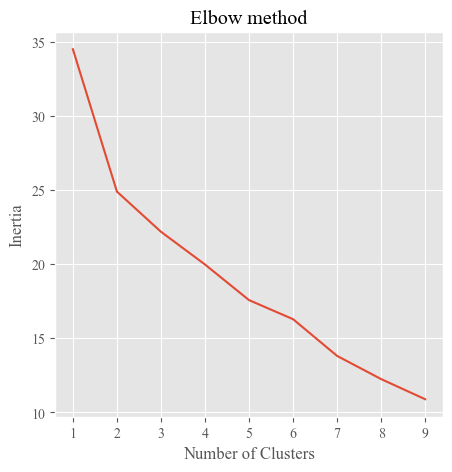

In [111]:
pt.get_elbow(X_2_kmeans)

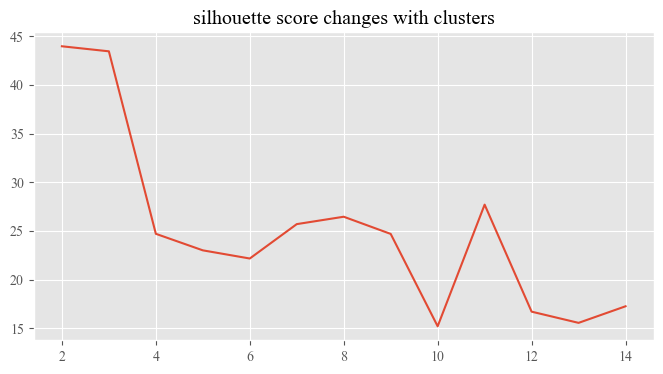

In [112]:
# using the silhouette method for quantifying results of the elbow methods
kmeans_2_clust = np.arange(2,15)
kmeans_2_score = []

for clust in kmeans_2_clust:
    kmeans = KMeans(n_clusters=clust, init='k-means++', random_state=42)
    kmeans_fit = kmeans.fit(X_2_kmeans)
    kmeans_2_score.append(silhouette_score(X_2_kmeans, kmeans_fit.labels_)*100)
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.lineplot(x = kmeans_2_clust, y=kmeans_2_score)
plt.title('silhouette score changes with clusters');

Seeing how the highest silhouette score was achieved with a clusters of 2 (4 clusters is pretty close) of `45%`, I will use this for clustering analysis

In [113]:
# instantiating the kmeans class with n_clusters of 2 for the first try
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_2_fit = kmeans_2.fit(X_2_kmeans) # running the kmeans only on the subset of data

model_2_clust_scaled_df['clusters'] = kmeans_2_fit.labels_

In [114]:
model_2_clust_scaled_df.query('clusters==0')

,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10,...,protein_14,protein_15,protein_16,protein_17,protein_18,ID,treatment,nuclear_effect,kidney_effect,clusters
5,1.000000,0.541695,0.126738,0.031576,0.706084,0.023026,0.142274,0.420834,0.037565,0.021454,...,0.048630,0.121848,0.157932,0.107327,0.607738,mouse_6,Sick,47394.60011,0.260000,0
7,0.290947,0.073051,0.170322,0.053423,0.974461,0.201432,0.198178,0.465872,0.063501,0.204742,...,0.109127,0.255118,0.530514,0.062200,0.705658,mouse_8,Sick,56525.10516,0.172500,0
8,0.248339,0.791961,1.000000,0.201309,0.200734,0.356231,0.103604,0.665899,0.163712,0.201734,...,0.122134,0.053411,0.389943,0.068159,0.212244,mouse_9,Sick,8201.94219,0.134000,0
10,0.049169,0.000000,0.146704,0.056672,0.068992,0.176084,0.000000,0.026336,0.004731,0.041701,...,0.119270,0.745297,0.047795,0.007285,0.796289,mouse_11,Sick,44809.29062,0.913000,0
14,0.061711,0.037298,0.075546,0.109146,0.056366,0.473297,0.101562,0.090618,0.016816,0.072427,...,0.087048,0.006110,0.132894,1.000000,0.336260,mouse_15,Sick,30241.90423,0.202529,0
17,0.434136,0.033820,0.135445,0.019193,1.000000,0.009288,0.032114,0.930614,1.000000,0.011331,...,0.133212,0.022364,0.495031,0.041655,0.278105,mouse_18,Sick,15874.66383,0.091000,0
18,0.105814,0.020872,0.774806,0.058465,0.266812,0.011029,0.095163,0.034738,0.002337,0.109763,...,0.128388,0.222477,0.177714,0.373618,1.000000,mouse_19,Sick,104132.44880,0.245000,0
19,0.083223,0.042806,0.063179,0.025562,0.020197,1.000000,0.165162,1.000000,0.042467,1.000000,...,0.191169,0.083960,0.159777,0.068159,0.617430,mouse_20,Sick,45608.77028,0.201500,0


In [115]:
model_2_clust_scaled_df.query('clusters==1')

,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10,...,protein_14,protein_15,protein_16,protein_17,protein_18,ID,treatment,nuclear_effect,kidney_effect,clusters
0,0.326412,0.017876,0.197334,0.034495,0.062283,0.011610,0.046600,0.069522,0.073420,0.070196,...,0.096684,0.087961,0.474696,0.055854,0.426725,mouse_1,Sick,33378.159140,0.201500,1
1,0.403488,1.000000,0.248968,0.061030,0.007896,0.012964,0.405661,0.110313,0.251268,0.036325,...,0.084940,0.106805,0.152330,0.013587,0.239748,mouse_2,Sick,30187.662070,0.152500,1
2,0.611711,0.002609,0.065176,0.048204,0.341846,0.030379,0.019865,0.079640,0.036368,0.030591,...,0.071381,0.051635,0.000000,0.033521,0.278684,mouse_3,Sick,52030.887890,0.130000,1
3,0.622342,0.000290,0.209097,0.015832,0.313459,0.005805,0.166418,0.142973,0.070911,0.027546,...,0.258810,0.106805,1.000000,0.041655,0.373706,mouse_4,Sick,44809.290620,0.141000,1
4,0.061711,0.020292,0.059048,0.028569,0.661373,0.002902,0.268452,0.005827,0.053583,0.038014,...,0.058777,0.000000,0.136882,0.165415,0.161876,mouse_5,Sick,16081.342550,0.095500,1
6,0.347591,0.017296,0.277961,0.031576,0.788781,0.013351,0.232334,0.097800,0.000000,0.060183,...,0.045836,0.056881,0.325894,0.230267,0.179935,mouse_7,Sick,16777.593610,0.135500,1
9,0.083223,0.051309,0.220480,0.025562,0.032859,0.035023,0.002041,0.051226,0.030211,0.066016,...,0.009154,0.023094,0.079865,0.062200,0.293679,mouse_10,Sick,44809.290620,0.185000,1
11,0.097176,0.021161,0.016498,0.031576,0.313459,0.008707,0.082679,0.094006,0.459157,0.082267,...,0.031680,0.068171,0.302515,0.079199,0.075719,mouse_12,Sick,45032.974890,0.139000,1
12,0.034718,0.033820,0.009932,0.004599,0.018075,0.035991,0.102151,0.128292,0.033860,0.019753,...,0.175810,0.009962,0.157932,0.024344,0.188800,mouse_13,Sick,44809.290620,0.202529,1
13,0.149668,0.095951,0.054731,0.012383,0.013417,0.052438,0.593043,0.497131,0.079633,0.279253,...,0.264263,0.030997,0.276716,0.049045,0.636733,mouse_14,Sick,82957.736090,0.121500,1


## Statistical Testing on the Clustering output

### Hypothesis testing: `nuclear_effect`

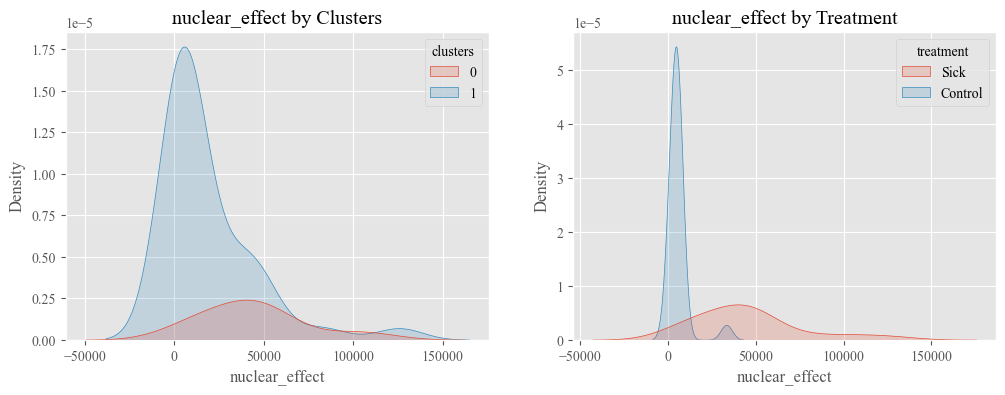

In [116]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
sns.kdeplot(ax = ax1, x = model_2_clust_scaled_df['nuclear_effect'], hue=model_2_clust_scaled_df['clusters'], fill = True, alpha = 0.2)
ax1.set(title = 'nuclear_effect by Clusters');

sns.kdeplot(ax = ax2, x = model_2_clust_scaled_df['nuclear_effect'], hue=model_2_clust_scaled_df['treatment'], fill = True, alpha = 0.2)
ax2.set(title = 'nuclear_effect by Treatment');

In [117]:
mean_nuc_0 = np.mean(model_2_clust_scaled_df.query('clusters==0')['nuclear_effect'])
mean_nuc_1 = np.mean(model_2_clust_scaled_df.query('clusters==1')['nuclear_effect'])

print(f'The mean of the nuclear_effect output for cluster 0 is: {mean_nuc_0} \nThe mean of the nuclear_effect output for cluster 1 is: {mean_nuc_1}')

The mean of the nuclear_effect output for cluster 0 is: 44098.59065247656 
The mean of the nuclear_effect output for cluster 1 is: 18688.484841021043


In [118]:
# t.test
X = model_2_clust_scaled_df.query('clusters==0')['nuclear_effect']
y = model_2_clust_scaled_df.query('clusters==1')['nuclear_effect']
tstats, pval = ttest_ind(X, y, equal_var=False)

print(f'Non-parametric T-test results: \nT-statistics: {tstats}\nP-value: {pval}')

Non-parametric T-test results: 
T-statistics: 2.246671709332837
P-value: 0.049103634446956326


### Hypothesis Testing: `kidney_effect`

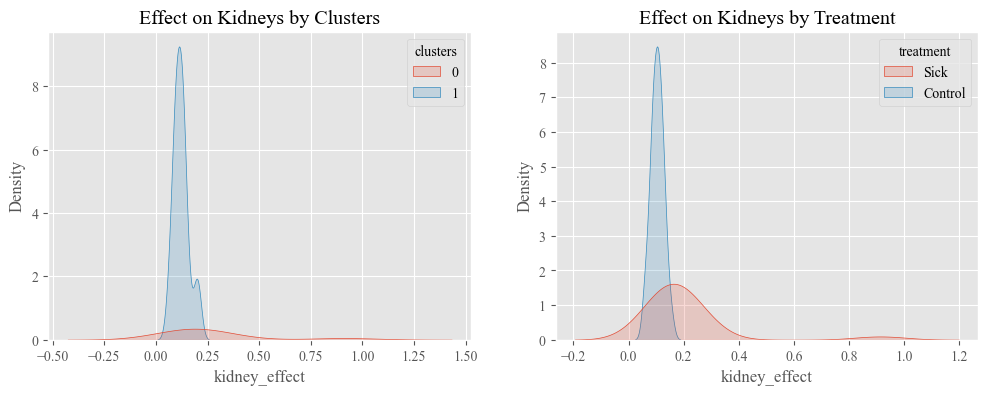

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,4))
sns.kdeplot(ax = ax1, x = model_2_clust_scaled_df['kidney_effect'], hue=model_2_clust_scaled_df['clusters'], fill = True, alpha = 0.2)
ax1.set(title = 'Effect on Kidneys by Clusters');

sns.kdeplot(ax = ax2, x = model_2_clust_scaled_df['kidney_effect'], hue=model_2_clust_scaled_df['treatment'], fill = True, alpha = 0.2)
ax2.set(title = 'Effect on Kidneys by Treatment');

In [121]:
mean_kid_0 = np.mean(model_2_clust_scaled_df.query('clusters==0')['kidney_effect'])
mean_kid_1 = np.mean(model_2_clust_scaled_df.query('clusters==1')['kidney_effect'])

print(f'The mean of the kidney_effect output for cluster 0 is: {mean_kid_0} \nThe mean of the kidney_effect output for cluster 1 is: {mean_kid_1}')

The mean of the kidney_effect output for cluster 0 is: 0.2774411764705883 
The mean of the kidney_effect output for cluster 1 is: 0.11955839727195225


In [122]:
# t.test
X = model_2_clust_scaled_df.query('clusters==0')['kidney_effect']
y = model_2_clust_scaled_df.query('clusters==1')['kidney_effect']
tstats, pval = ttest_ind(X, y, equal_var=False)

print(f'Non-parametric T-test results: \nT-statistics: {tstats}\nP-value: {pval}')

Non-parametric T-test results: 
T-statistics: 1.6964079515570967
P-value: 0.13326447404014743


## Visualization of the Results

First looking at the independent clustering results for both `nuclear_effect` and `kidney_effect` output

### Independent Visualization: `nuclear_effect`

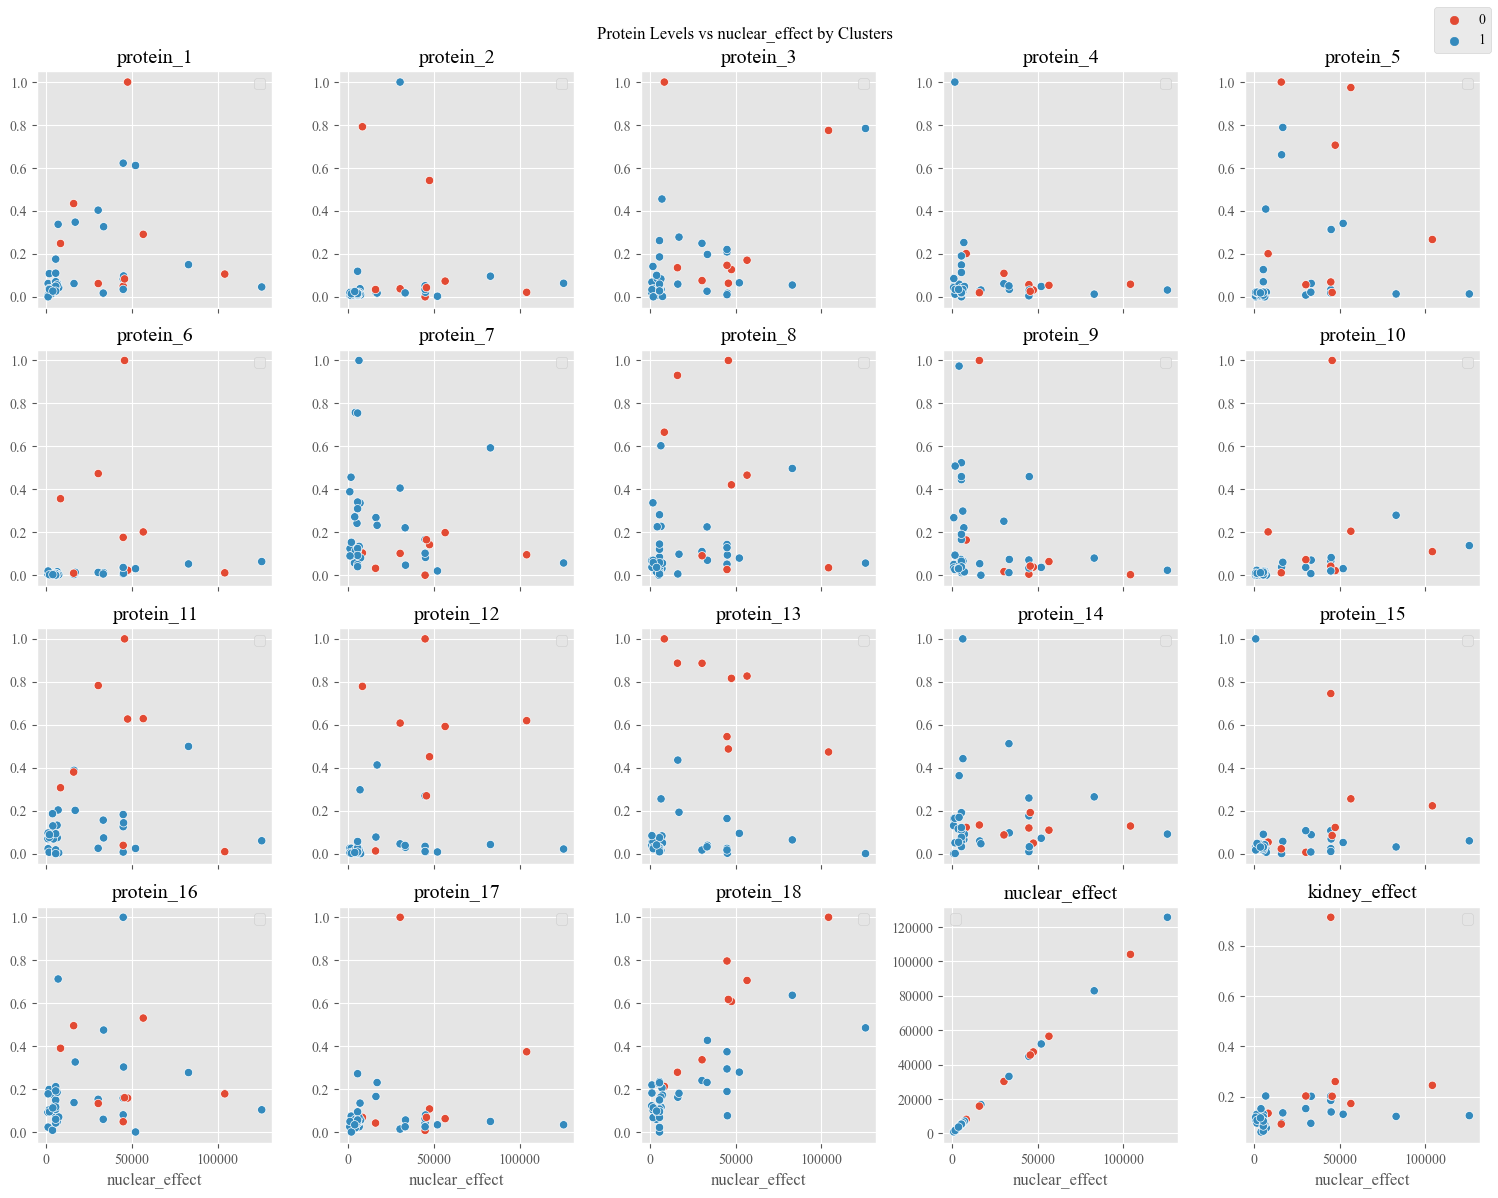

In [130]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize=(5*3,4*3), sharex=True)
for col, ax in zip(pt.get_num_var(model_2_clust_scaled_df), np.ravel(ax)):
    sns.scatterplot(ax= ax, data=model_2_clust_scaled_df, x = 'nuclear_effect', y = col, hue= 'clusters', hue_order=[0,1])
    ax.set(ylabel=None, title = col)
    ax.legend([])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');
fig.suptitle('Protein Levels vs nuclear_effect by Clusters')
fig.tight_layout();

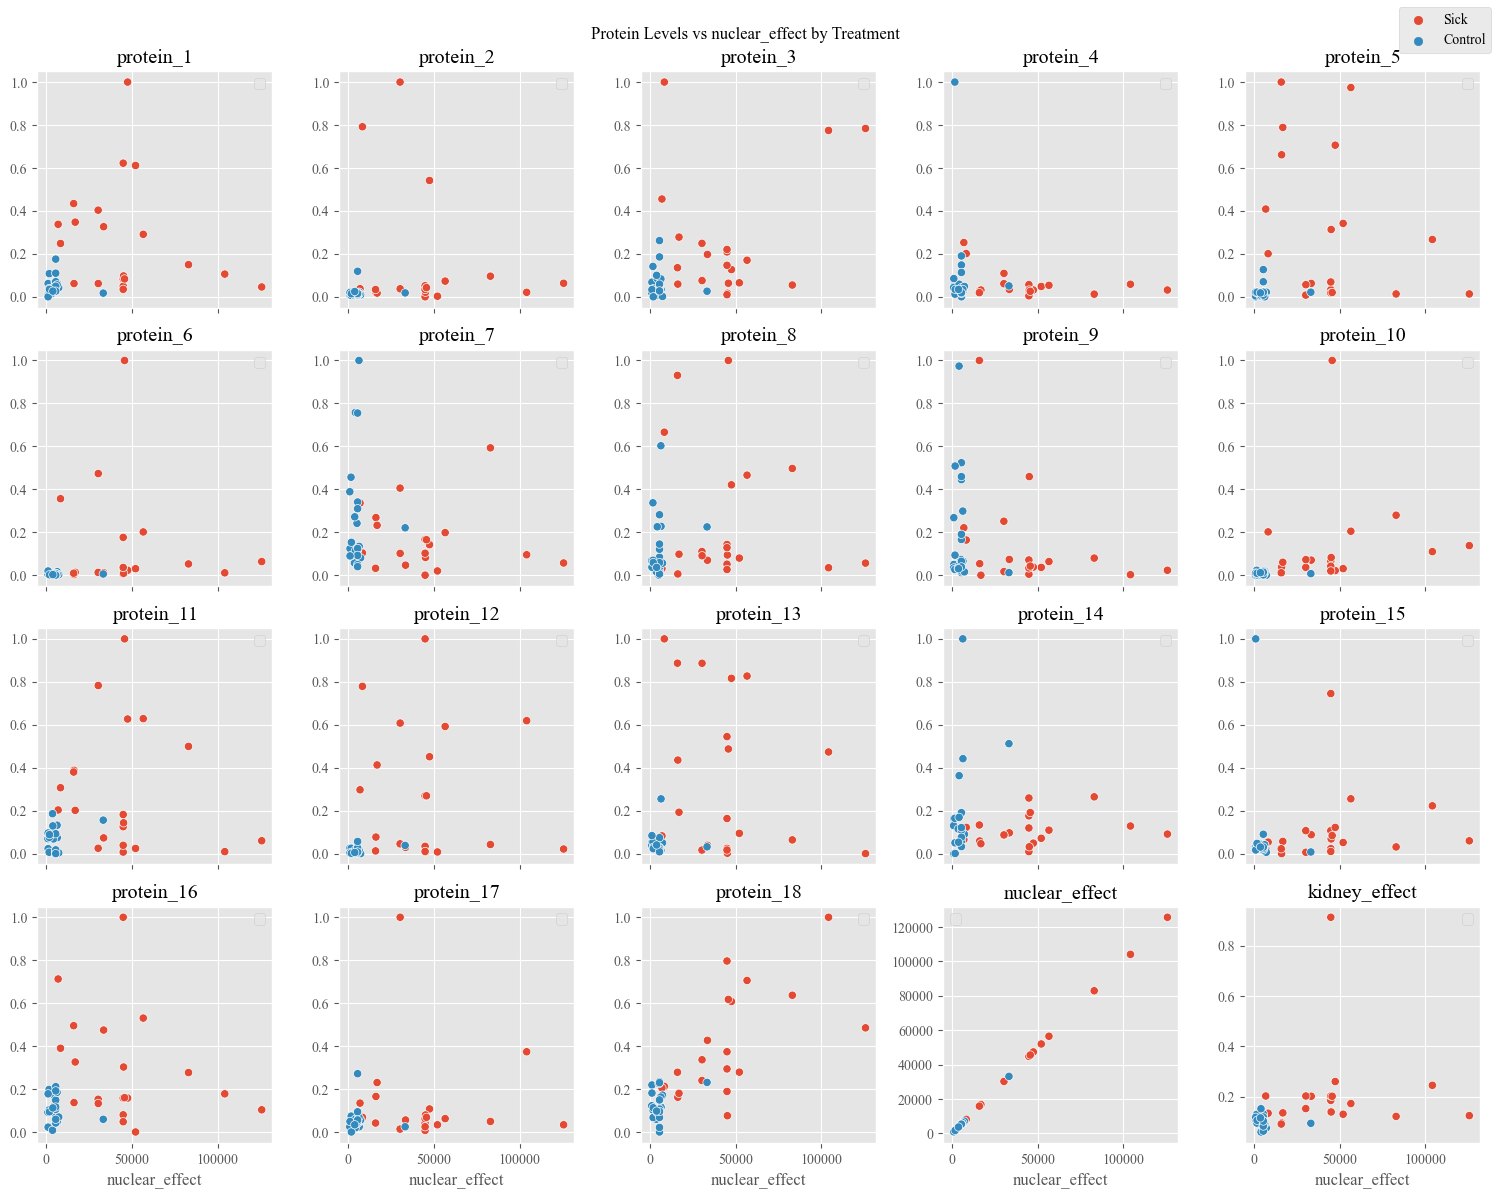

In [129]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize=(5*3,4*3), sharex=True)
for col, ax in zip(pt.get_num_var(model_2_clust_scaled_df), np.ravel(ax)):
    sns.scatterplot(ax= ax, data=model_2_clust_scaled_df, x = 'nuclear_effect', y = col, hue= 'treatment')
    ax.set(ylabel=None, title = col)
    ax.legend([])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');
fig.suptitle('Protein Levels vs nuclear_effect by Treatment')
fig.tight_layout();

### Independent Visualization: `kidney_effect`

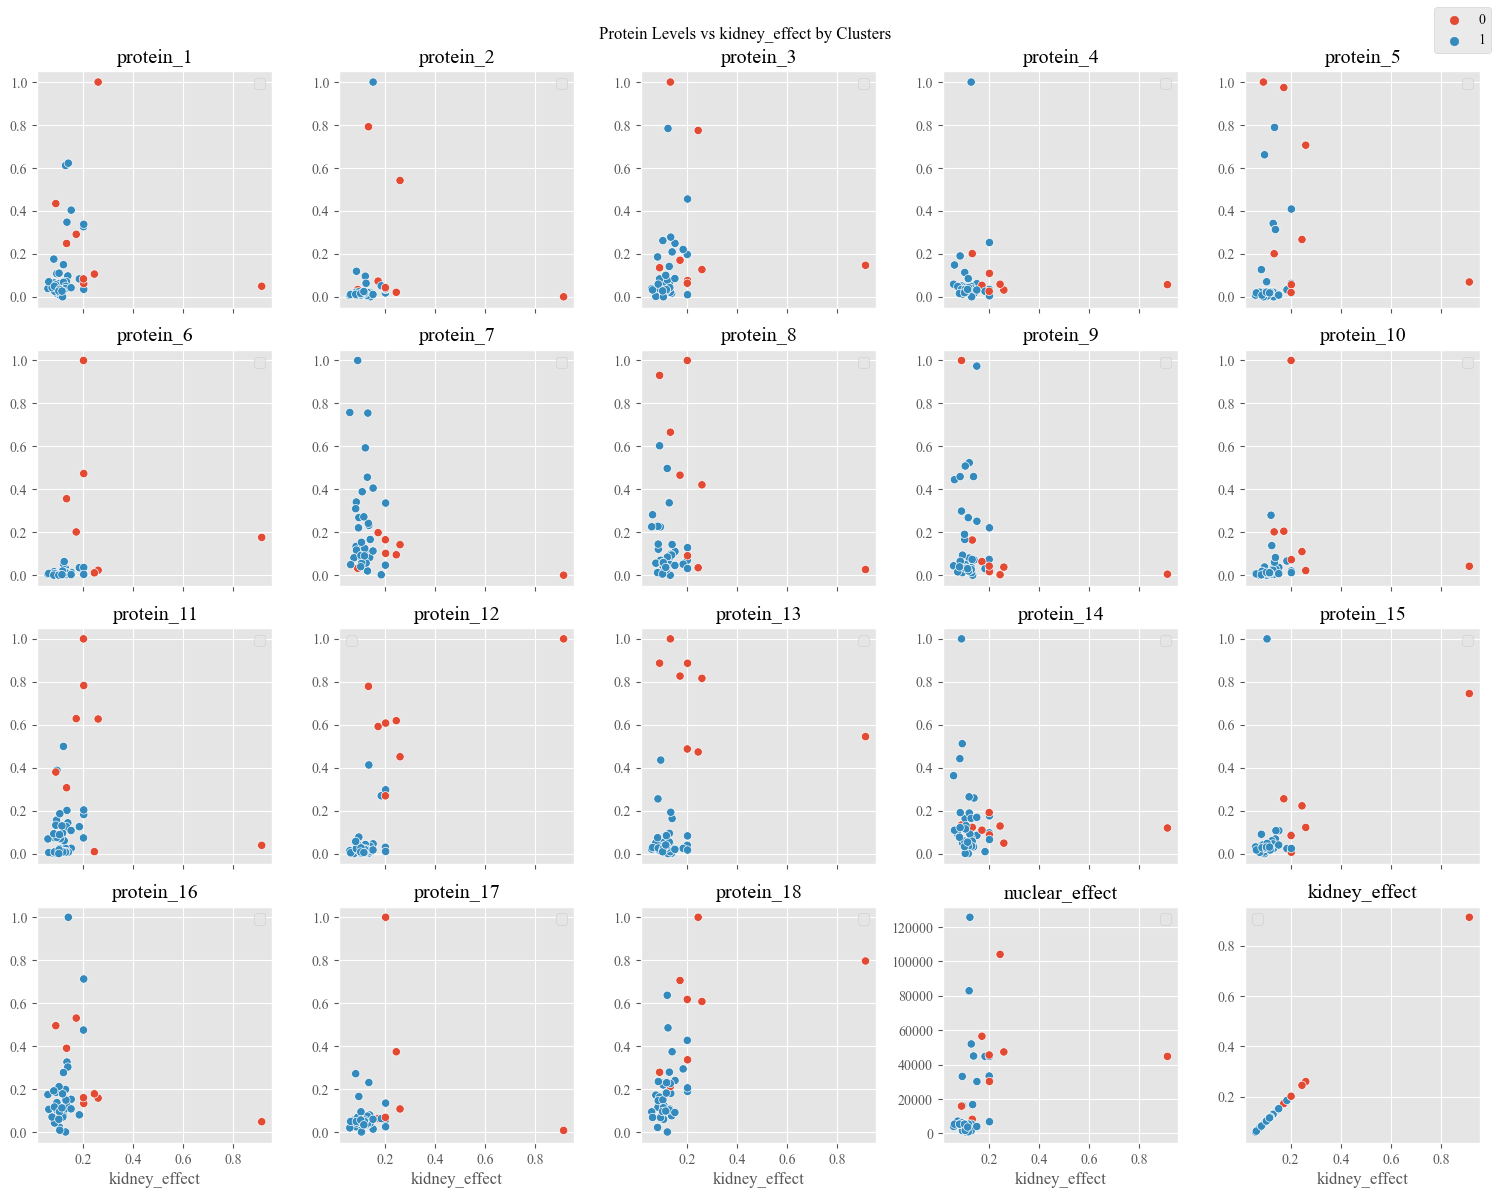

In [128]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize=(5*3,4*3), sharex=True)
for col, ax in zip(pt.get_num_var(model_2_clust_scaled_df), np.ravel(ax)):
    sns.scatterplot(ax= ax, data=model_2_clust_scaled_df, x = 'kidney_effect', y = col, hue= 'clusters', hue_order=[0,1])
    ax.set(ylabel=None, title = col)
    ax.legend([])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');
fig.suptitle('Protein Levels vs kidney_effect by Clusters')
fig.tight_layout();

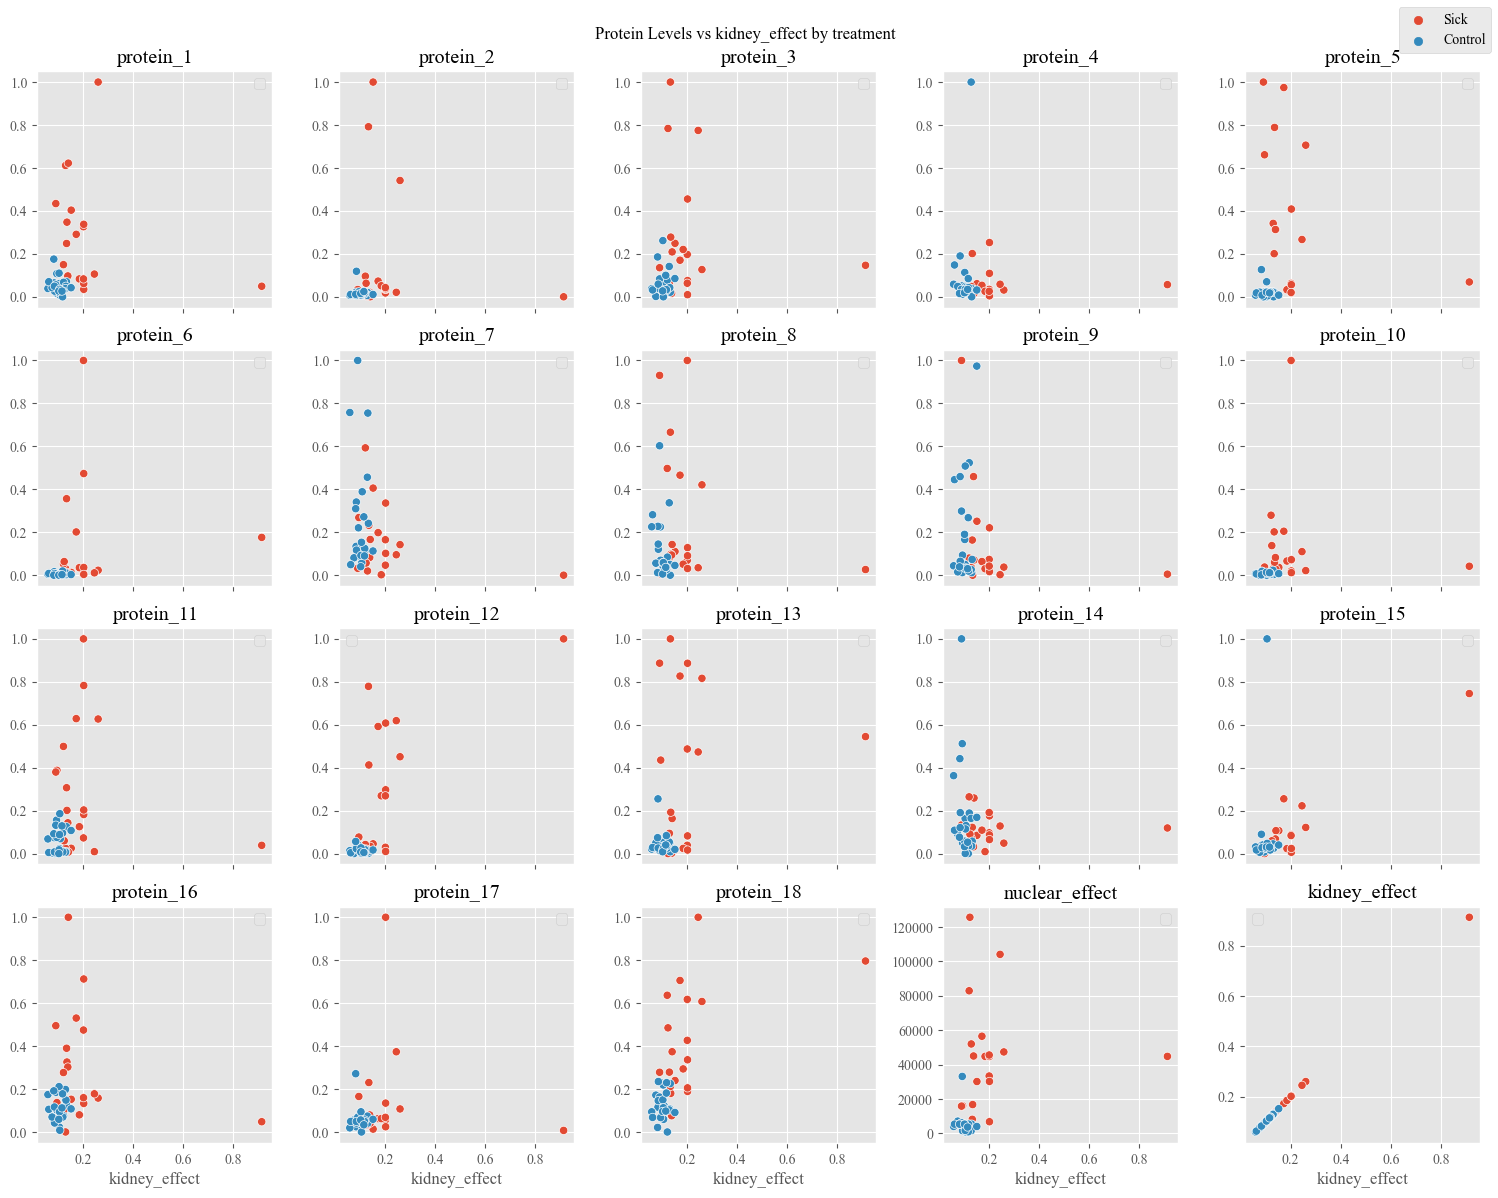

In [127]:
fig, ax = plt.subplots(ncols = 5, nrows = 4, figsize=(5*3,4*3), sharex=True)
for col, ax in zip(pt.get_num_var(model_2_clust_scaled_df), np.ravel(ax)):
    sns.scatterplot(ax= ax, data=model_2_clust_scaled_df, x = 'kidney_effect', y = col, hue= 'treatment')
    ax.set(ylabel=None, title = col)
    ax.legend([])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right');
fig.suptitle('Protein Levels vs kidney_effect by treatment')
fig.tight_layout();

## Visualization with PCA

In [131]:
# getting the X dataframe
X_2_num_var = pt.get_num_var(model_2_clust_scaled_df)
X_2_pca = model_2_clust_scaled_df[X_2_num_var] # already normalized X values

# instantiating the PCA model
pca_2 = PCA(n_components=2, random_state=42)

# fitting the model using the scaled dataset
principalComponents_2 = pca_2.fit_transform(X_2_pca)
principalDF_2 = pd.DataFrame(principalComponents_2, columns=['pca1', 'pca2'])

principalDF_2['clusters'] = model_2_clust_scaled_df['clusters']
principalDF_2['treatment'] = model_2_clust_scaled_df['treatment']

principalDF_2

,pca1,pca2,clusters,treatment
0,10069.655061,-0.181900,1,Sick
1,6879.157990,-0.119985,1,Sick
2,28722.383809,-0.260165,1,Sick
3,21500.786542,0.021769,1,Sick
4,-7227.161529,0.294621,1,Sick
5,24086.096038,1.037043,0,Sick
6,-6530.910466,0.413458,1,Sick
7,33216.601089,1.064489,0,Sick
8,-15106.561880,1.331462,0,Sick
9,21500.786540,-0.306740,1,Sick


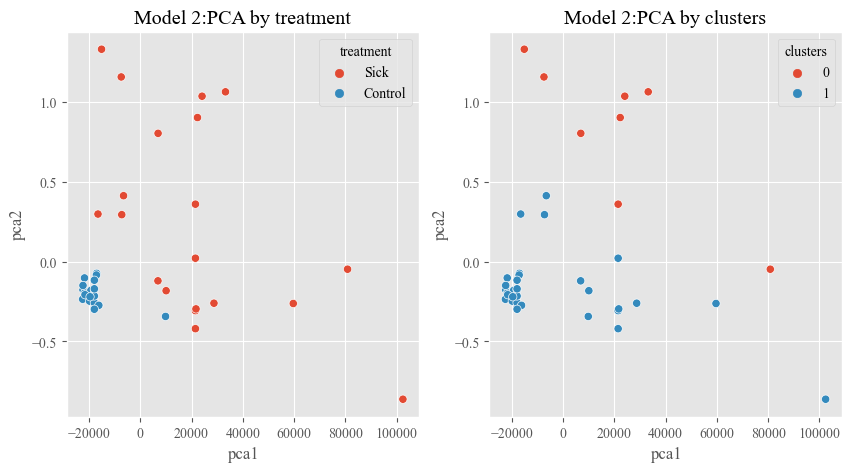

In [132]:
# visualization of Principal component analysis
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(ax=ax1, data=principalDF_2, x = 'pca1', y='pca2', hue='treatment')
ax1.set(title='Model 2:PCA by treatment')
sns.scatterplot(ax=ax2, data=principalDF_2, x=  'pca1', y='pca2', hue = 'clusters', hue_order=[0,1])
ax2.set(title = 'Model 2:PCA by clusters');

### Conclusion: 
Although the hypothesis testing was only significant using the `nuclear_effect` output compared to the `kidney_effect` we can see that the clusters did a good job clustering the samples into the correct grouping

---
<h2 align='center'>Conclusion<a name='5'></a></h2>

## Model 1 Summary:

1. The KMeans detected an optimal clustering of `2 clusters` with a silhouette score of ~`35%`
2. The `systemic_effect` readout was significantly different based on the grouping and is a positive indicator for the model's success
3. The PCA analysis/visualization confirms clustering effects due to the model

### Next steps:

1. Repeat the experiment with more samples and perhaps including other features as well

In [133]:
kmeans_1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'warn',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

## Model 2 Summary:

1. The KMeans detected an optimal clustering of `2 clusters` with a silhouette score of ~`45%`
2. The 'nuclear' readout was significantly different based on the grouping and is a positive indicator for the model's sucess, however the second validation feature `kidney_effect` was not able to achieve significance after testing.
3. The PCA analysis/visualization confirms clustering effects due to the model

### Next Steps:
1. If using pursuing this model, optimize hyperparameters for prediction capabilities (*maybe pursue this in the aging sample data set)

In [134]:
kmeans_2_fit.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'warn',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}